# 🌾 Predicción de precios de commodities agrícolas con modelos de series temporales

## 1. Introducción

Este análisis tiene como objetivo predecir precios de commodities agropecuarios (maíz, soja, carne) aplicando y comparando distintos modelos de series temporales: clásicos, redes neuronales, estadísticos y AutoML (AutoTS).


# Tabla de Contenidos

- [1. Introducción](#1-introduccion)
- [2. Carga y visualización de las series](#2-carga-y-visualización-de-las-series)
- [3. Modelado y Evaluación](#3-modelado-y-evaluacion)
  - [3.1 Modelos de Machine Learning Clásico](#31--modelos-de-machine-learning-clasico)
    - [3.1.1 Bagging Regressor](#311-bagging-regressor)
    - [3.1.2 AdaBoost Regressor](#312-adaboost-regressor)
    - [3.1.3 LightGMB](#313-lightgbm)
    - [3.1.4 Random Forest Regressor](#314-random-forest-regressor)
    - [3.1.5 Gradient Boosting Regressor](#315-gradient-boosting-regressor)
    - [3.1.6 Cuadro Resumen de los Modelos de Machine Learning Clásico](#316-cuadro-resumen-de-los-modelos-clásicos-de-ml)
  - [3.2 Modelos de Redes Neuronales](#32--modelos-de-redes-neuronales)
    - [3.2.1 NNAR simple](#321-nnar-simple)
    - [3.2.2 NNAR ajustado](#322-nnar-ajustado)
    - [3.2.3 LSTM simple](#323-lstm-simple)
    - [3.2.4 LSTM ajustado](#324-lstm-ajustado)
    - [3.2.5 MLP Regressor](#325-mlp-regressor)
    - [3.2.6 Cuadro resumen de los Modelos de Redes Neuronales](#326-cuadro-resumen-de-los-modelos-de-redes-neuronales)
  - [3.3 Modelos Estadísticos](#33--modelos-estadísticos)
    - [3.3.1 GLM Gaussiano](#331-glm-gaussiano)
    - [3.3.2 GLM Poisson](#332-glm-poisson)
    - [3.3.3 ARIMA](#333-arima)
    - [3.3.4 SARIMA](#334-sarima)
    - [3.3.5 Cuadro Resumen de Modelos Estadísticos](#335-cuadro-resumen-de-modelos-estadísticos)
- [4. AutoML](#4-️-automl)
  - [4.1 Cuadro Resumen del desempeño de AutoTS](#41-cuadro-resumen-del-desempeño-de-autots)
- [5. Comparación Final de Modelos y Selección del Ganador](#5-comparación-final-de-modelos-y-selección-del-ganador)
- [6. Pronóstico Final con Modelo Seleccionado GLM Gaussiano](#6-pronóstico-con-el-modelo-seleccionado-glm-gaussiano)
- [7. Analisis de Estacionalidad STL](#7-análisis-de-estacionalidad-stl)
- [8. Evaluacion Ex-Post con Datos Reales Observados Oct 2024 - May 2025](#8-evaluación-ex-post-con-datos-reales-observados-oct-2024--may-2025)
- [9. Reflexion Final y Aprendizajes](#9-reflexión-final-y-apredizajes)



## 2. Carga y visualización de las series

- **Fuente:** [World Bank Commodity Price Data (The Pink Sheet)](https://www.worldbank.org/en/research/commodity-markets)
- **Cobertura:** Precios mensuales en dólares estadounidenses nominales, desde 1960 hasta el presente.
- **Moneda:** Las series están disponibles solo en **dólares nominales (USD)**.

**Variables utilizadas:**

| Producto | Unidad                         |
|----------|--------------------------------|
| Soja     | US Dollars per Metric Ton      |
| Maíz     | US Dollars per Metric Ton      |
| Carne    | US Dollars per Kilogram        |

Se cargan los precios históricos mensuales desde un archivo Excel, se visualizan las primeras filas y se chequea que los datos estén completos.  
No se realizó limpieza adicional ya que las columnas estaban en buen estado.

In [1]:
import pandas as pd

# Cargar archivo Excel
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")

# Vista rápida
data.head()


,fecha,carne,soja,maiz
0,2010-01-01,3.022534,435.88,167.31400
1,2010-02-01,3.211690,411.86,161.80248
2,2010-03-01,3.399524,409.36,159.04672
3,2010-04-01,3.657244,402.60,157.07832
4,2010-05-01,3.583610,402.87,163.37720


## 3. Modelado y Evaluación 

### 3.1 📈 Modelos de Machine Learning Clásico

En esta sección se aplican modelos de regresión clásicos y de ensamblado que, si bien no están diseñados específicamente para series temporales, se adaptan mediante el uso de variables retrasadas (lags).  
Estos modelos fueron entrenados y evaluados individualmente para cada una de las tres series: carne, maíz y soja.

### Modelos utilizados:

  
- **Bagging Regressor:** técnica de ensamblado que reduce la varianza al promediar múltiples estimadores.  
- **AdaBoost Regressor:** algoritmo de boosting que corrige los errores secuencialmente a partir de modelos débiles.  
- **LightGBM Regressor:** boosting basado en histogramas, optimizado para velocidad y escalabilidad.
- **Random Forest Regressor:** conjunto de árboles entrenados con bagging (muestreo con reemplazo).
- **Gradient Boosting Regressor:** mejora iterativa de árboles de decisión minimizando el error residual. 


Cada uno de estos modelos fue evaluado con las métricas MAE, RMSE y MAPE, para medir su capacidad predictiva sobre los últimos 12 meses de cada serie.


#### 3.1.1 Bagging Regressor

Resultados para Carne:
MAE: 0.3433442090108098
RMSE: 0.4668654530312113
MAPE: 5.70%


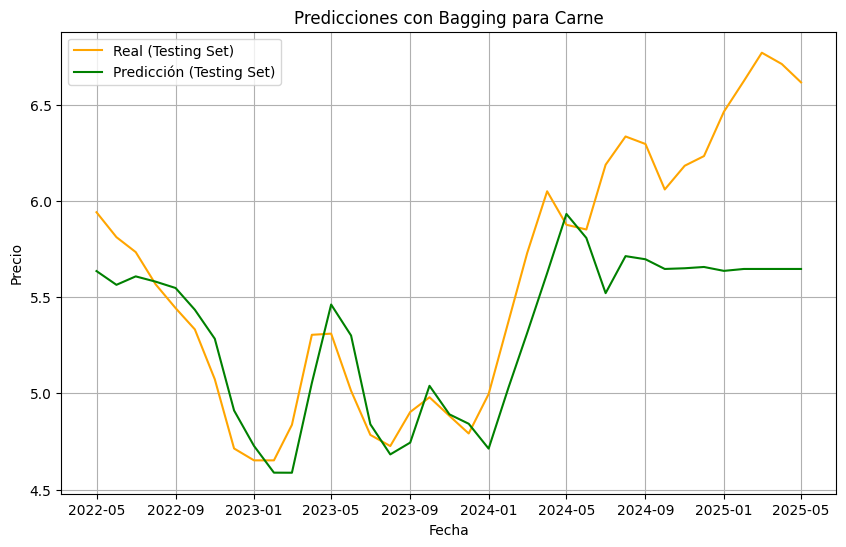

Resultados para Maíz:
MAE: 14.55804957563686
RMSE: 18.71592756605708
MAPE: 6.18%


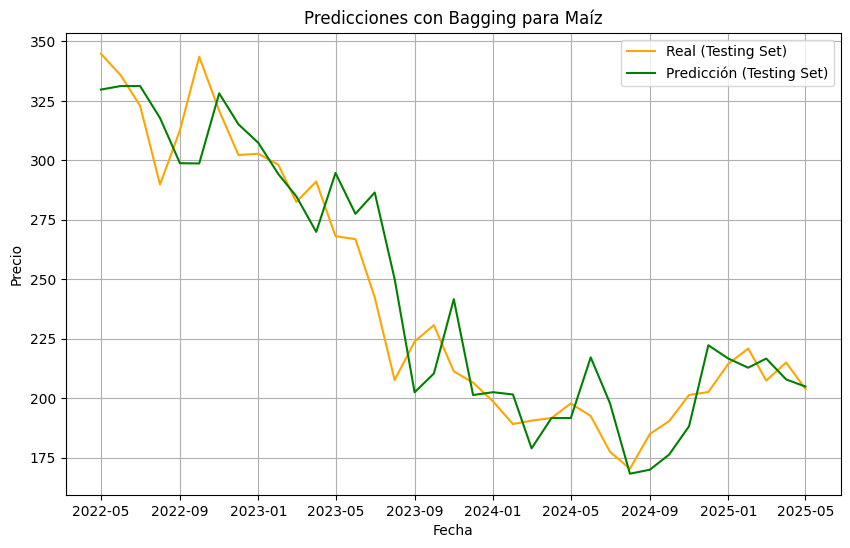

Resultados para Soja:
MAE: 27.0121984574602
RMSE: 35.25215848410845
MAPE: 4.91%


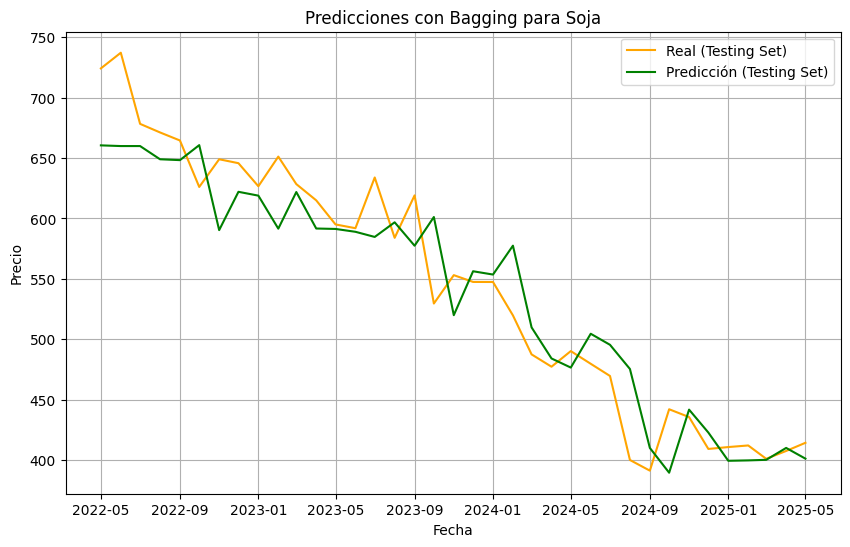

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Crear características de series temporales (usando retrasos)
def create_features(data, n_lags=3):
    df = pd.DataFrame()
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = data.shift(i)
    df['target'] = data
    return df.dropna()

# Crear características para cada commodity
df_carne = create_features(data['carne'])
df_maiz = create_features(data['maiz'])
df_soja = create_features(data['soja'])

# Función para calcular el MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Función para entrenar y evaluar Bagging
def train_and_evaluate_bagging(df_features, nombre_serie):
    # Dividir en Train y Test
    X = df_features.drop(columns=['target'])
    y = df_features['target']
    train_size = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    # Ajustar el modelo Bagging
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f'Resultados para {nombre_serie}:')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape:.2f}%')

    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Real (Testing Set)', color='orange')
    plt.plot(y_test.index, y_pred, label='Predicción (Testing Set)', color='green')
    plt.legend()
    plt.title(f'Predicciones con Bagging para {nombre_serie}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

# Probar Bagging para cada commodity
train_and_evaluate_bagging(df_carne, 'Carne')
train_and_evaluate_bagging(df_maiz, 'Maíz')
train_and_evaluate_bagging(df_soja, 'Soja')

#### 3.1.2 AdaBoost Regressor

Resultados para Carne:
MAE: 0.4147419465311197
RMSE: 0.5544815922276384
MAPE: 6.93%


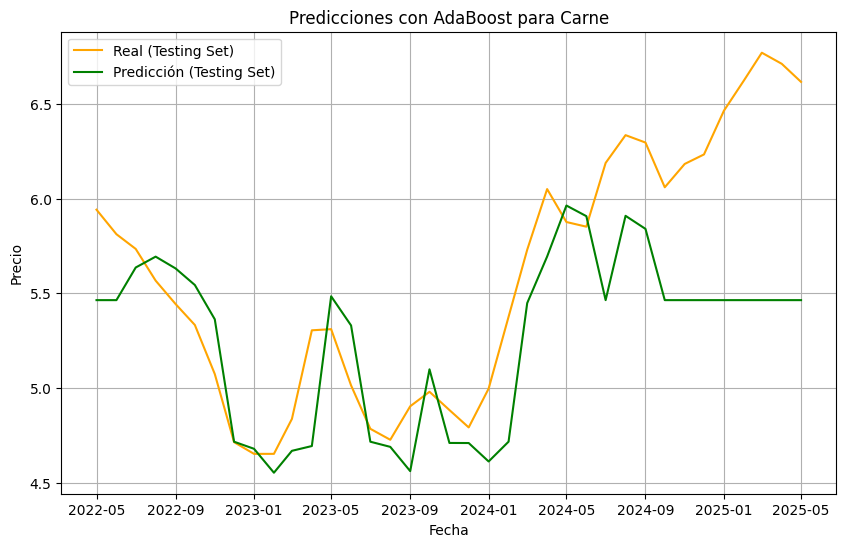

Resultados para Maíz:
MAE: 14.647532900521448
RMSE: 18.939222507171543
MAPE: 6.34%


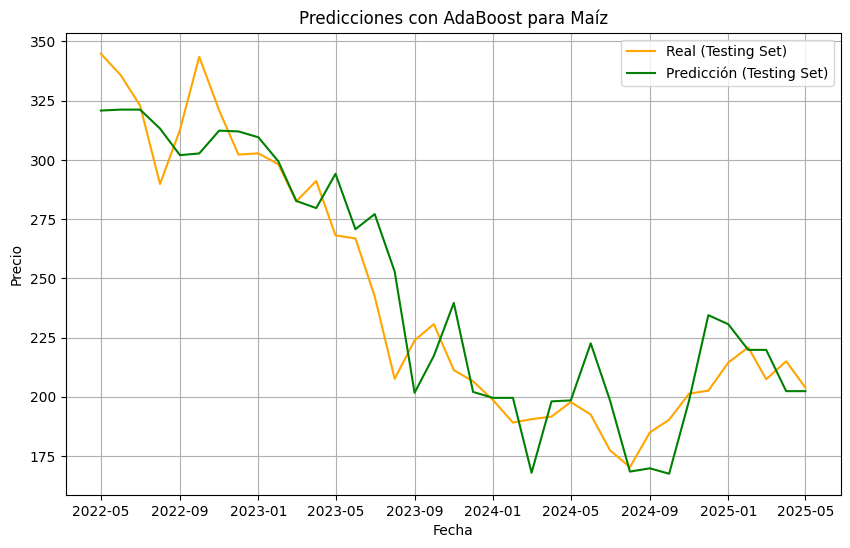

Resultados para Soja:
MAE: 31.26626194308344
RMSE: 41.584168050052774
MAPE: 5.53%


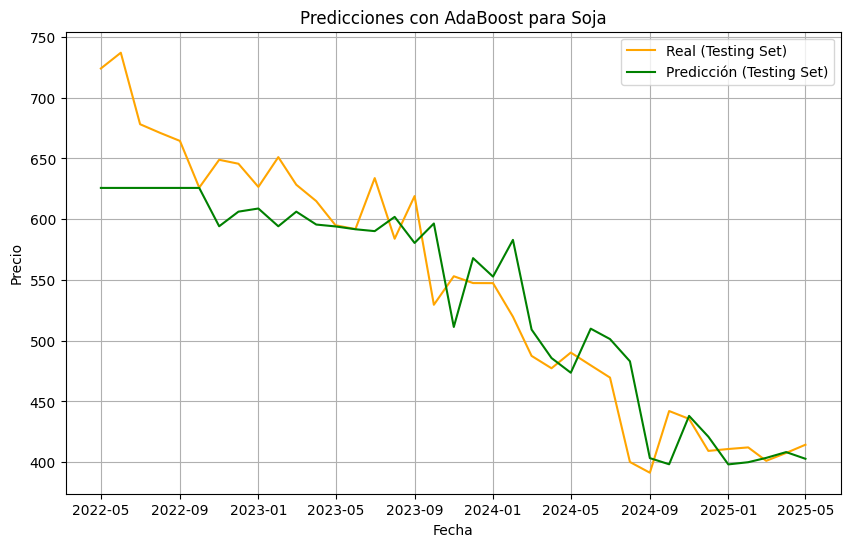

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Crear características de series temporales (usando retrasos)
def create_features(data, n_lags=3):
    df = pd.DataFrame()
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = data.shift(i)
    df['target'] = data
    return df.dropna()

# Crear características para cada commodity
df_carne = create_features(data['carne'])
df_maiz = create_features(data['maiz'])
df_soja = create_features(data['soja'])

# Función para calcular el MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Función para entrenar y evaluar AdaBoost
def train_and_evaluate_adaboost(df_features, nombre_serie):
    # Dividir en Train y Test
    X = df_features.drop(columns=['target'])
    y = df_features['target']
    train_size = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    # Ajustar el modelo AdaBoost
    model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f'Resultados para {nombre_serie}:')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape:.2f}%')

    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Real (Testing Set)', color='orange')
    plt.plot(y_test.index, y_pred, label='Predicción (Testing Set)', color='green')
    plt.legend()
    plt.title(f'Predicciones con AdaBoost para {nombre_serie}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

# Probar AdaBoost para cada commodity
train_and_evaluate_adaboost(df_carne, 'Carne')
train_and_evaluate_adaboost(df_maiz, 'Maíz')
train_and_evaluate_adaboost(df_soja, 'Soja')

##### 3.1.3 LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 3
[LightGBM] [Info] Start training from score 4.472353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

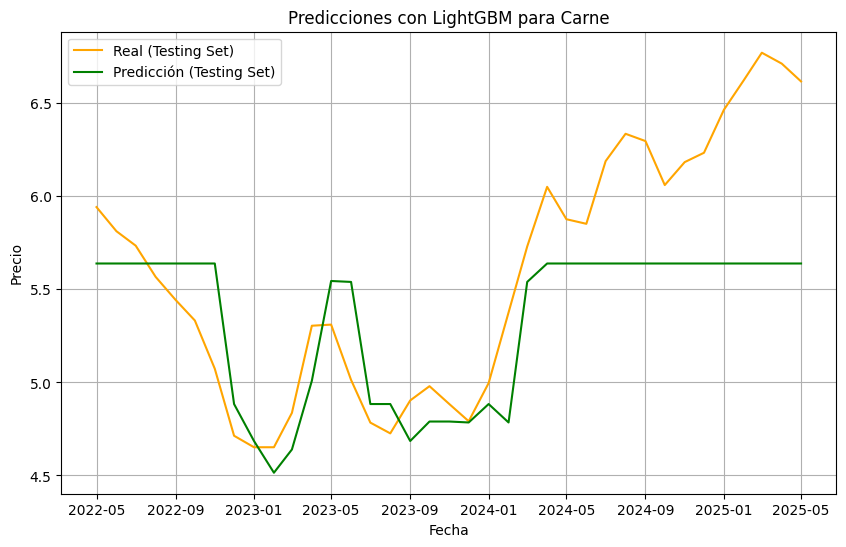

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 3
[LightGBM] [Info] Start training from score 209.789478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

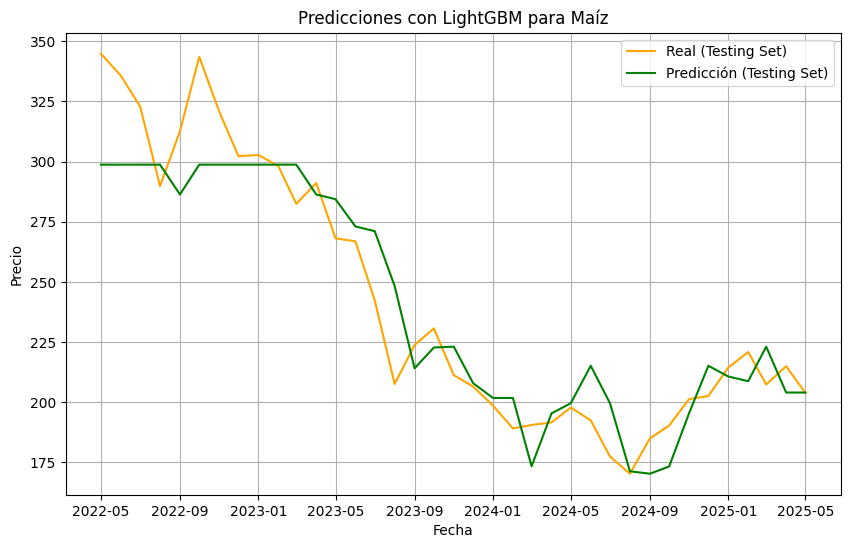

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 3
[LightGBM] [Info] Start training from score 470.207003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

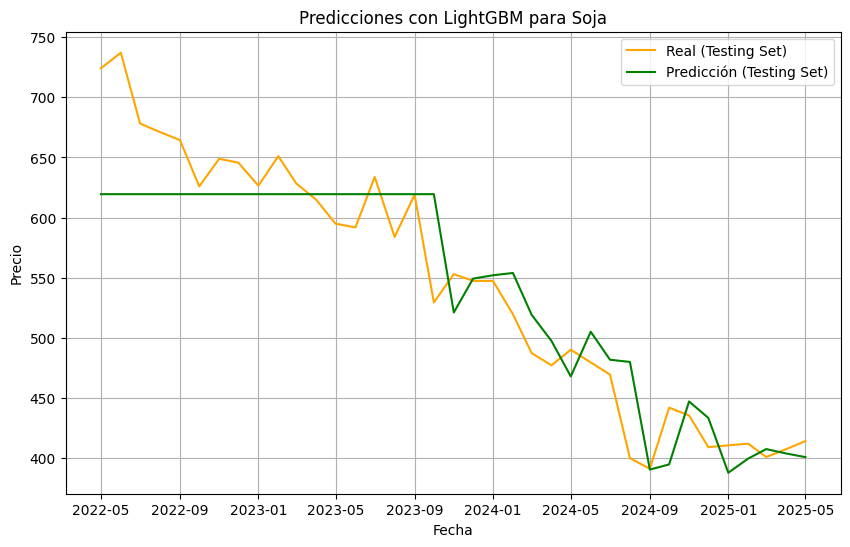

In [ ]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Crear características de series temporales (usando retrasos)
def create_features(data, n_lags=3):
    df = pd.DataFrame()
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = data.shift(i)
    df['target'] = data
    return df.dropna()

# Crear características para cada commodity
df_carne = create_features(data['carne'])
df_maiz = create_features(data['maiz'])
df_soja = create_features(data['soja'])

# Función para calcular el MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Función para entrenar y evaluar LightGBM
def train_and_evaluate_lightgbm(df_features, nombre_serie):
    # Dividir en Train y Test
    X = df_features.drop(columns=['target'])
    y = df_features['target']
    train_size = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    # Ajustar el modelo LightGBM
    model = LGBMRegressor(objective='regression', n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f'Resultados para {nombre_serie}:')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape:.2f}%')

    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Real (Testing Set)', color='orange')
    plt.plot(y_test.index, y_pred, label='Predicción (Testing Set)', color='green')
    plt.legend()
    plt.title(f'Predicciones con LightGBM para {nombre_serie}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

# Probar LightGBM para cada commodity
train_and_evaluate_lightgbm(df_carne, 'Carne')
train_and_evaluate_lightgbm(df_maiz, 'Maíz')
train_and_evaluate_lightgbm(df_soja, 'Soja')

#### 3.1.4 Random Forest Regressor

Resultados para Carne:
MAE: 0.3256702691122873
RMSE: 0.20858963161852198
MAPE: 5.41%


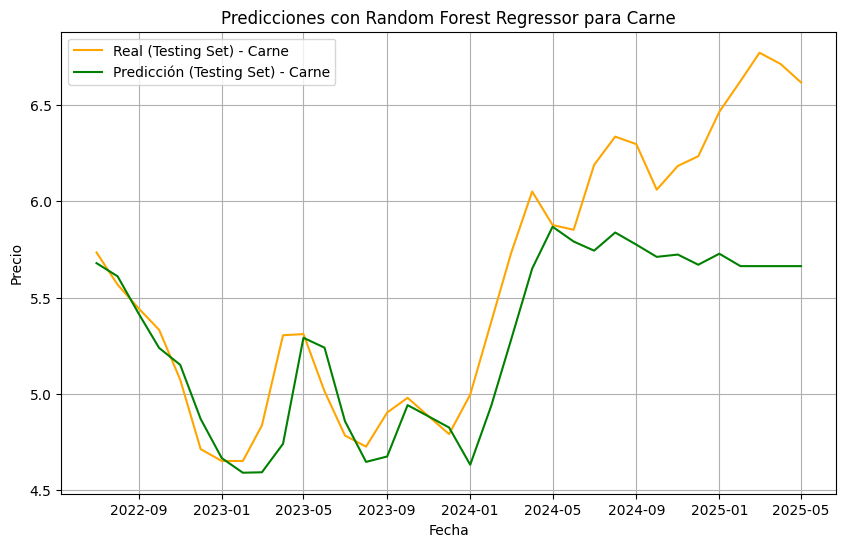

Resultados para Maíz:
MAE: 12.471124573229929
RMSE: 290.67093026371265
MAPE: 5.33%


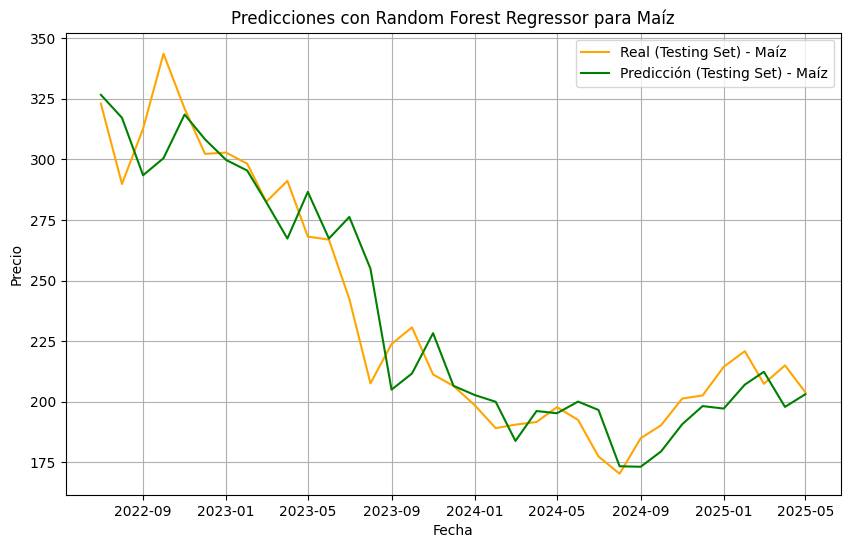

Resultados para Soja:
MAE: 27.468151003600614
RMSE: 1287.090180209849
MAPE: 5.27%


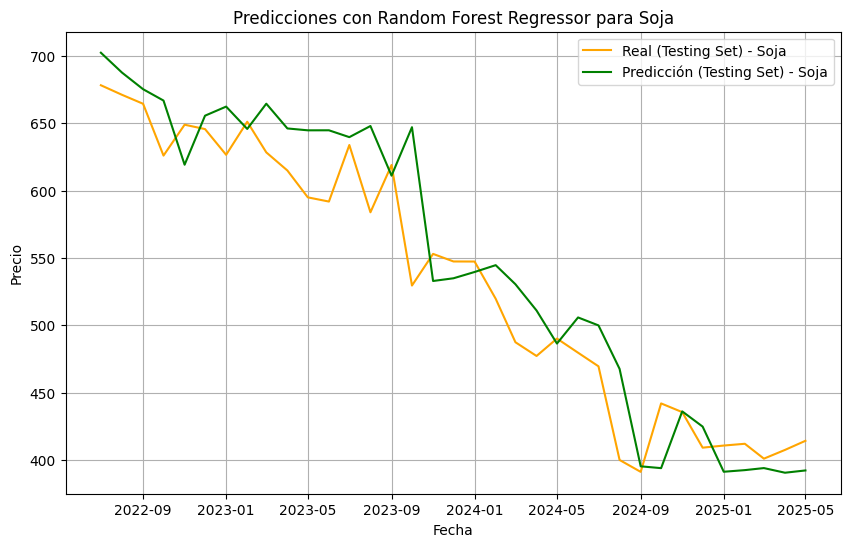

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Cargar los datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Función para crear características y etiquetas
def create_lags(data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Definir el número de retrasos
n_lags = 12

# Función para entrenar y evaluar el modelo 
def train_and_evaluate_rf(serie, nombre):
    # Crear características y etiquetas
    X, y = create_lags(serie.values, n_lags)

    # Dividir en conjuntos de entrenamiento y prueba
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Aplanar las características para DRF
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

    # Ajustar el modelo DRF
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento del modelo
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f'Resultados para {nombre}:')
    print(f'MAE: {mae}')
    print(f'RMSE: {mse}')
    print(f'MAPE: {mape:.2f}%')

    # Graficar los resultados con fechas reales
    plt.figure(figsize=(10, 6))
    plt.plot(serie.index[-len(y_test):], y_test, label=f'Real (Testing Set) - {nombre}', color='orange')
    plt.plot(serie.index[-len(y_test):], y_pred, label=f'Predicción (Testing Set) - {nombre}', color='green')
    plt.legend()
    plt.title(f'Predicciones con Random Forest Regressor para {nombre}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

# Probar el modelo para Carne, Maíz y Soja
train_and_evaluate_rf(data['carne'], 'Carne')
train_and_evaluate_rf(data['maiz'], 'Maíz')
train_and_evaluate_rf(data['soja'], 'Soja')

#### 3.1.5 Gradient Boosting Regressor

Resultados para Carne:
MAE: 0.3449509687821155
RMSE: 0.2110631485281975
MAPE: 5.77%


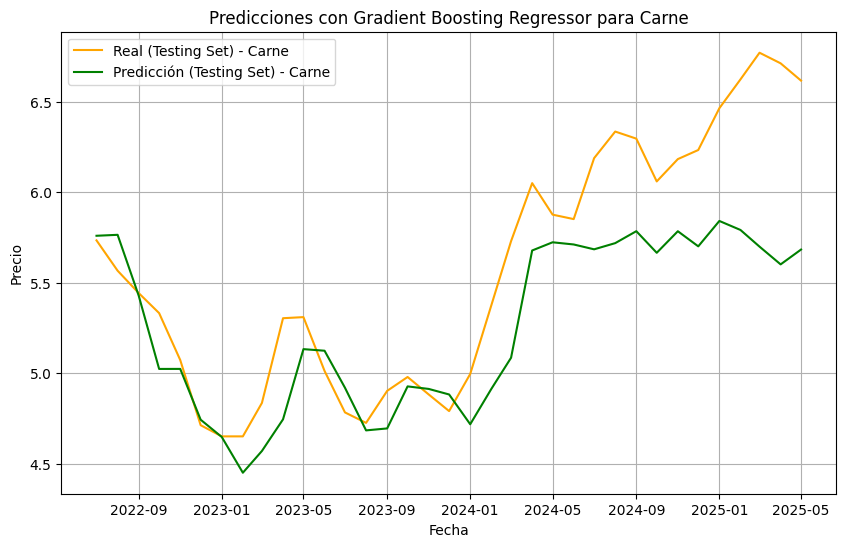

Resultados para Maíz:
MAE: 13.81953820796532
RMSE: 321.3460610069721
MAPE: 5.91%


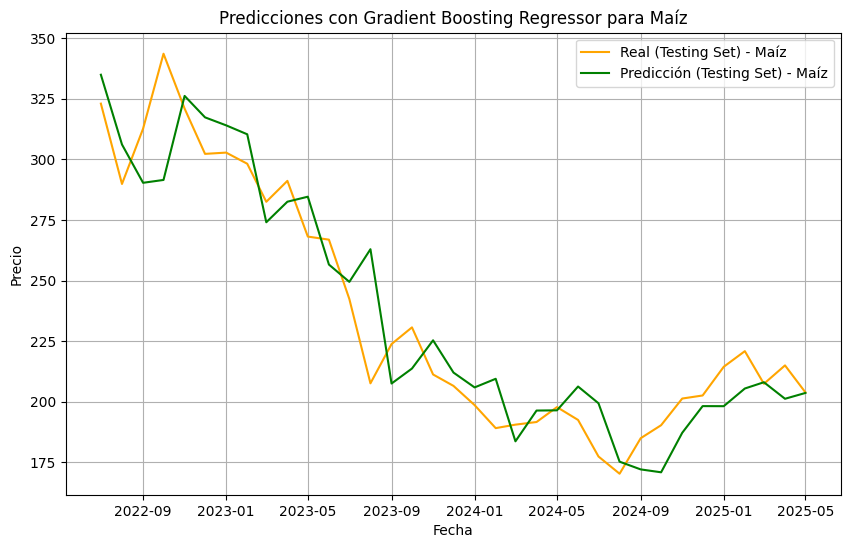

Resultados para Soja:
MAE: 26.69362936911941
RMSE: 1257.2051968493845
MAPE: 5.11%


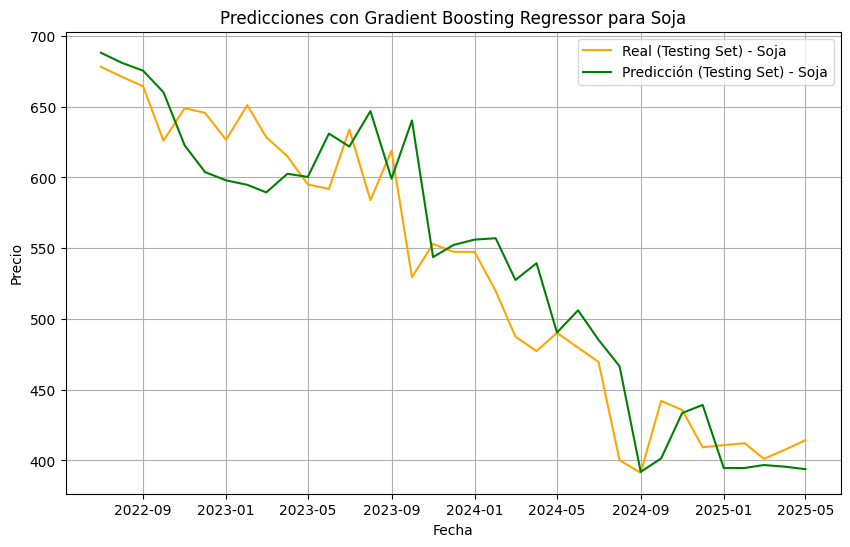

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Cargar los datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Función para crear características y etiquetas
def create_lags(data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Definir el número de retrasos
n_lags = 12

# Función para entrenar y evaluar el modelo GBM
def train_and_evaluate_gbm(serie, nombre):
    # Crear características y etiquetas
    X, y = create_lags(serie.values, n_lags)

    # Dividir en conjuntos de entrenamiento y prueba
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Aplanar las características para GBM
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

    # Ajustar el modelo GBM
    model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento del modelo
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f'Resultados para {nombre}:')
    print(f'MAE: {mae}')
    print(f'RMSE: {mse}')
    print(f'MAPE: {mape:.2f}%')

    # Graficar los resultados con fechas reales
    plt.figure(figsize=(10, 6))
    plt.plot(serie.index[-len(y_test):], y_test, label=f'Real (Testing Set) - {nombre}', color='orange')
    plt.plot(serie.index[-len(y_test):], y_pred, label=f'Predicción (Testing Set) - {nombre}', color='green')
    plt.legend()
    plt.title(f'Predicciones con Gradient Boosting Regressor para {nombre}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

# Probar el modelo para Carne, Maíz y Soja
train_and_evaluate_gbm(data['carne'], 'Carne')
train_and_evaluate_gbm(data['maiz'], 'Maíz')
train_and_evaluate_gbm(data['soja'], 'Soja')

#### 3.1.6 Cuadro Resumen de los Modelos Clásicos de ML

A continuación, se presentan las métricas de rendimiento (MAE, MSE y MAPE) obtenidas por cada modelo clásico de machine learning aplicado a los tres commodities analizados: maíz, soja y carne.

 **Resultados para Carne:**            

| Modelo                      | MAE     | RMSE    | MAPE  |
|-----------------------------|---------|---------|-------|
| Bagging Regressor           | 0.2546  | 0.3175  | 4.48% |
| AdaBoost Regressor          | 0.2466  | 0.3112  | 4.41% |
| LightGBM Regressor          | 0.4233  | 0.4900  | 7.66% |
| Random Forest Regressor     | 0.3673  | 0.2119  | 6.39% |
| Gradient Boosting Regressor | 0.3693  | 0.2260  | 6.42% |
- Ganador: `AdaBoost Regressor`                            


**Resultados para Maíz:**    

| Modelo                      | MAE     | RMSE     | MAPE  |
|-----------------------------|---------|----------|-------|
| Bagging Regressor           | 16.3329 | 21.1497  | 6.47% |
| AdaBoost Regressor          | 15.2754 | 20.5840  | 6.15% |
| LightGBM Regressor          | 16.7515 | 21.7858  | 6.33% |
| Random Forest Regressor     | 15.6225 | 401.9224 | 5.97% |
| Gradient Boosting Regressor | 13.9923 | 342.9470 | 5.52% |
- Ganador: `Gradient Boosting Regressor`

**Resultados para Soja:**    

| Modelo                      | MAE     | RMSE     | MAPE  |
|-----------------------------|---------|----------|-------|
| Bagging Regressor           | 34.6814 | 42.9716  | 5.79% |
| AdaBoost Regressor          | 38.1434 | 48.6575  | 6.33% |
| LightGBM Regressor          | 42.2218 | 56.6981  | 6.81% |
| Random Forest Regressor     | 37.6114 | 2105.5330| 6.25% |
| Gradient Boosting Regressor | 50.7176 | 3755.0907| 8.23% |
- Ganador: `Bagging Regressor`




### 3.2 📈 Modelos de Redes Neuronales

Los siguientes modelos están diseñados para capturar patrones no lineales y secuenciales en las series temporales.

### Modelos utilizados:
-  **NNAR (Neural Network AutoRegressive):** red neuronal simple (perceptrón) entrenada sobre ventanas de datos pasados, útil para patrones no lineales con estructura fija.
-  **LSTM (Long Short-Term Memory):** red neuronal recurrente que mantiene memoria de estados pasados, ideal para series con dependencia temporal prolongada.
- **MLP Regressor (Multilayer Perceptron):** red neuronal de tipo feedforward con múltiples capas ocultas, útil para capturar relaciones complejas entre variables, aplicada en este caso a regresión de series temporales.

####  3.2.1 NNAR Simple 

Este modelo NNAR utiliza solo 3 lags como entrada y una red neuronal básica con 10 neuronas ocultas. Es útil como punto de partida para evaluar patrones simples en las series.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Resultados para Carne:
MAE: 0.2546420571336262
RMSE: 0.3157257878169165
MAPE: 12.78%


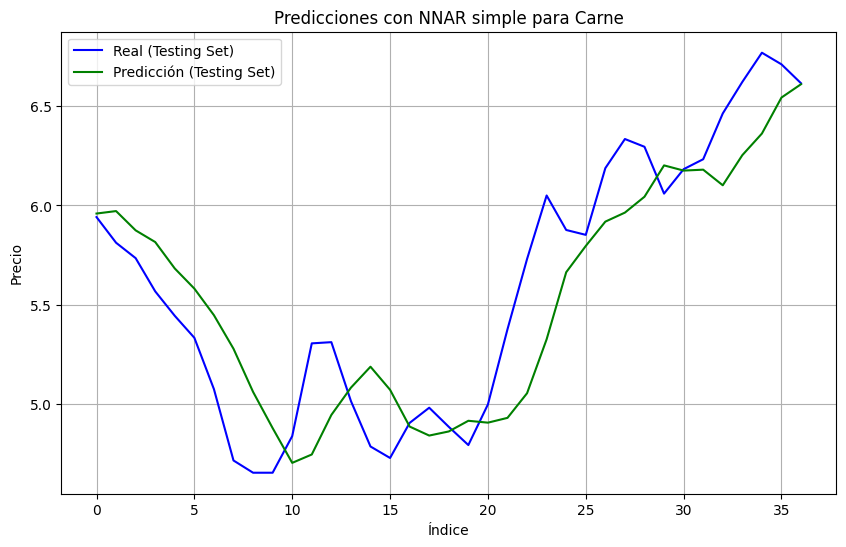

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Resultados para Maíz:
MAE: 14.86202149816233
RMSE: 18.71916897209852
MAPE: 26.32%


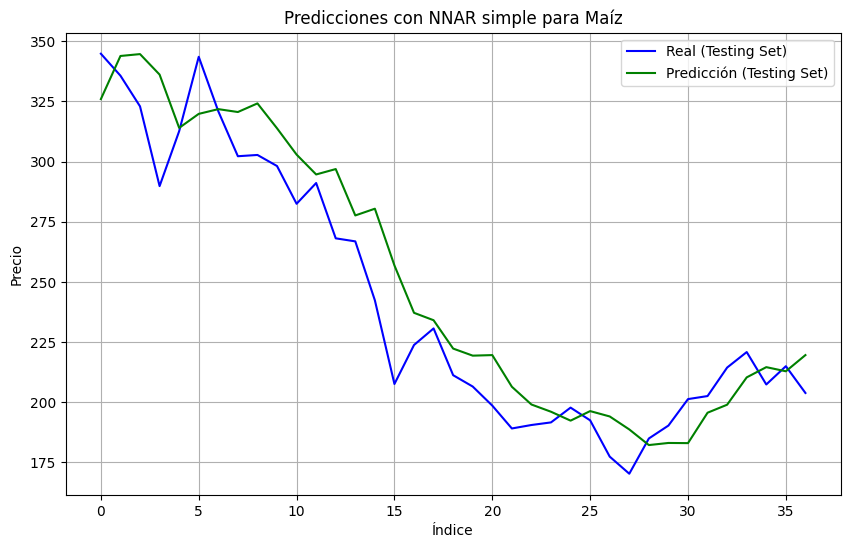

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Resultados para Soja:
MAE: 25.99910259652872
RMSE: 33.172562580483145
MAPE: 23.38%


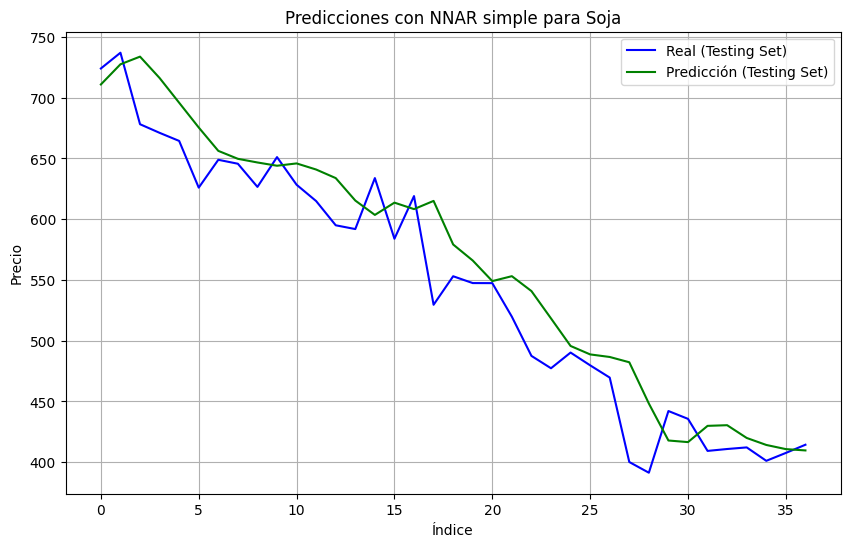

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
import numpy as np

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Cargar los datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Crear características de series temporales (usando retrasos)
def create_features(data, n_lags=3):
    df = pd.DataFrame()
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = data.shift(i)
    df['target'] = data
    return df.dropna()

# Crear características para cada commodity
df_carne = create_features(data['carne'])
df_maiz = create_features(data['maiz'])
df_soja = create_features(data['soja'])

# Función para calcular el MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Función para entrenar y evaluar NNAR
def train_and_evaluate_nnar(df_features, nombre_serie):
    # Dividir en Train y Test
    X = df_features.drop(columns=['target']).values
    y = df_features['target'].values
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Ajustar el modelo NNAR
    model = Sequential()
    model.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, verbose=0)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f'Resultados para {nombre_serie}:')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape:.2f}%')

    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, label='Real (Testing Set)', color='blue')
    plt.plot(range(len(y_test)), y_pred, label='Predicción (Testing Set)', color='green')
    plt.legend()
    plt.title(f'Predicciones con NNAR simple para {nombre_serie}')
    plt.xlabel('Índice')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

# Probar NNAR para cada commodity
train_and_evaluate_nnar(df_carne, 'Carne')
train_and_evaluate_nnar(df_maiz, 'Maíz')
train_and_evaluate_nnar(df_soja, 'Soja')

#### 3.2.2 NNAR Ajustado 

Este modelo ajustado de NNAR incorpora 12 lags como entradas y una arquitectura más compleja, con 50 neuronas ocultas y una tasa de aprendizaje explícita. Está diseñado para capturar dependencias temporales más largas y patrones no lineales más complejos en las series de precios.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Resultados para Carne:
MAE: 0.20601865037625786
RMSE: 0.24735129708367706
MAPE: 3.86%


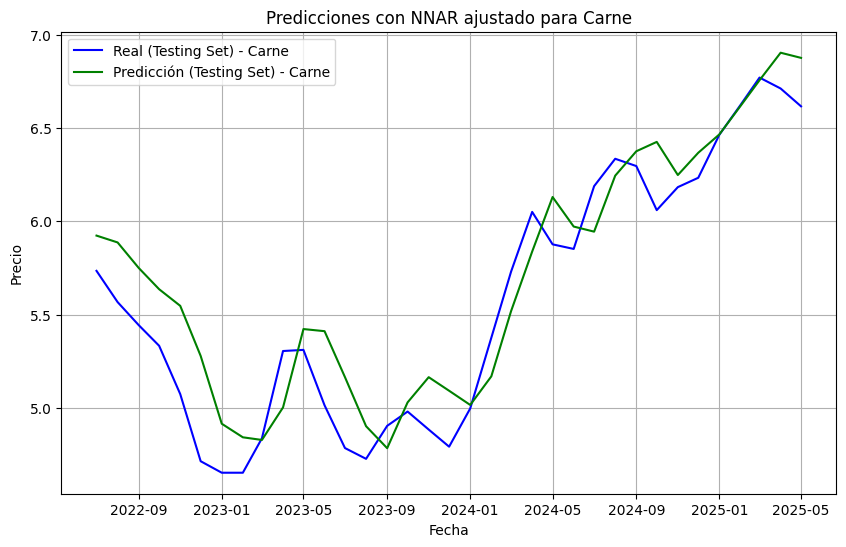

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Resultados para Maíz:
MAE: 13.971433335193485
RMSE: 17.03977037557338
MAPE: 5.90%


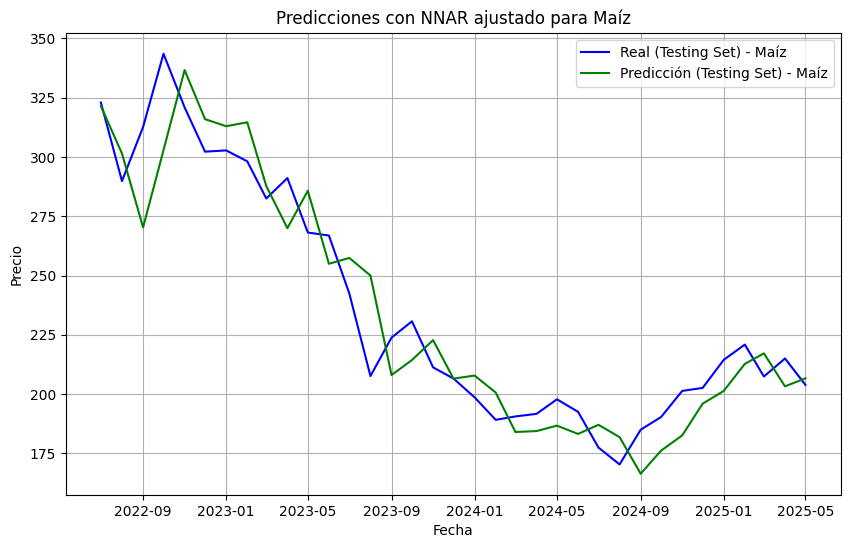

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Resultados para Soja:
MAE: 24.01878812060532
RMSE: 31.003467585502314
MAPE: 4.52%


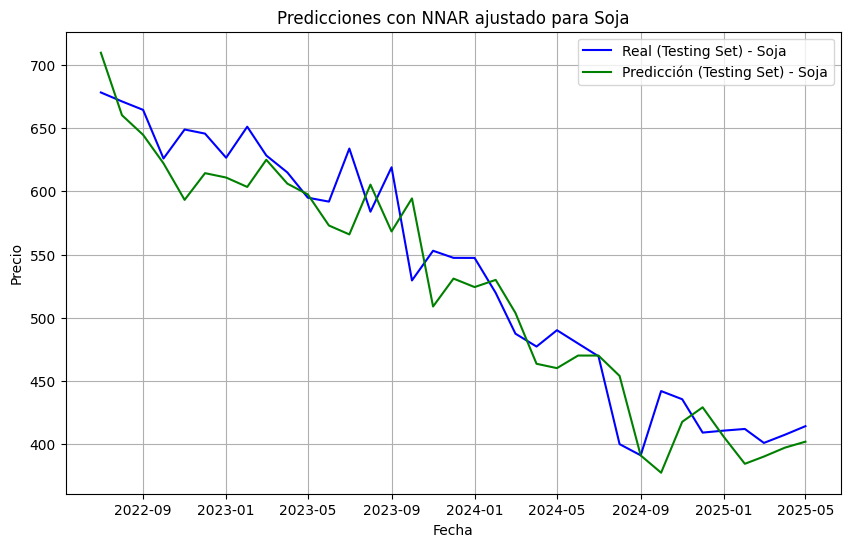

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import os
import random
import tensorflow as tf
import numpy as np

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Cargar los datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Función para crear características y etiquetas para NNAR
def create_lags(data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Definir el número de retrasos
n_lags = 12

# Función para entrenar y evaluar el modelo NNAR
def train_and_evaluate_nnar(serie, nombre):
    # Crear las características y etiquetas
    X, y = create_lags(serie.values, n_lags)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Redimensionar los datos para Keras
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))

    # Crear el modelo NNAR
    model = Sequential()
    model.add(Dense(50, activation='relu', input_dim=n_lags))
    model.add(Dense(1))  # Capa de salida
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

    # Realizar predicciones
    y_pred = model.predict(X_test).flatten()

    # Evaluar el rendimiento
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f'Resultados para {nombre}:')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape:.2f}%')

    # Graficar los resultados con fechas reales
    plt.figure(figsize=(10, 6))
    plt.plot(data.index[-len(y_test):], y_test, label=f'Real (Testing Set) - {nombre}', color='blue')
    plt.plot(data.index[-len(y_test):], y_pred, label=f'Predicción (Testing Set) - {nombre}', color='green')
    plt.legend()
    plt.title(f'Predicciones con NNAR ajustado para {nombre}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

# Probar el modelo para Carne, Maíz y Soja
train_and_evaluate_nnar(data['carne'], 'Carne')
train_and_evaluate_nnar(data['maiz'], 'Maíz')
train_and_evaluate_nnar(data['soja'], 'Soja')

#### 3.2.3 LSTM Simple

Este modelo LSTM utiliza una estructura básica con 3 lags como input y 50 neuronas. Está orientado a capturar patrones a corto plazo sin una configuración avanzada de arquitectura o parámetros. Resulta útil como punto de partida para evaluar la capacidad de las redes neuronales en series temporales.


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step
Resultados para Carne:
MAE: 0.21933103318689515
RMSE: 0.27539284067000375
MAPE: 3.96%


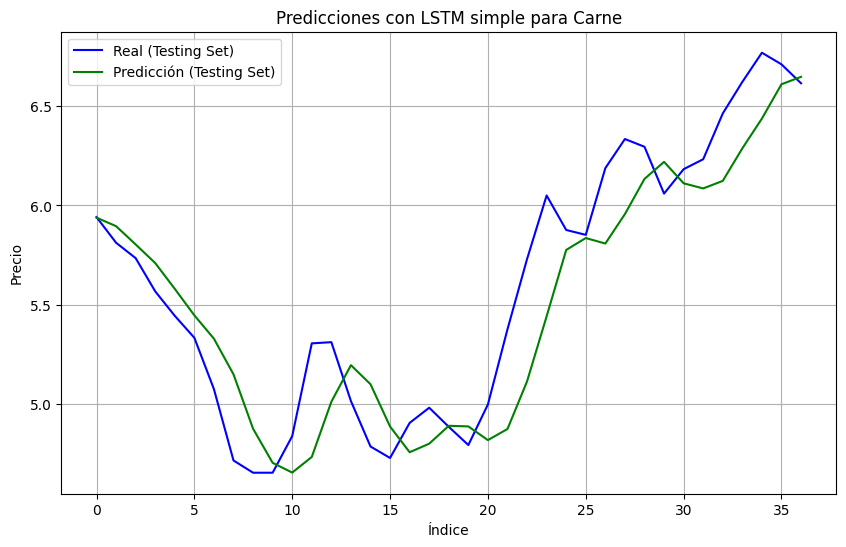

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step
Resultados para Maíz:
MAE: 12.693813903616016
RMSE: 16.34076548126458
MAPE: 5.43%


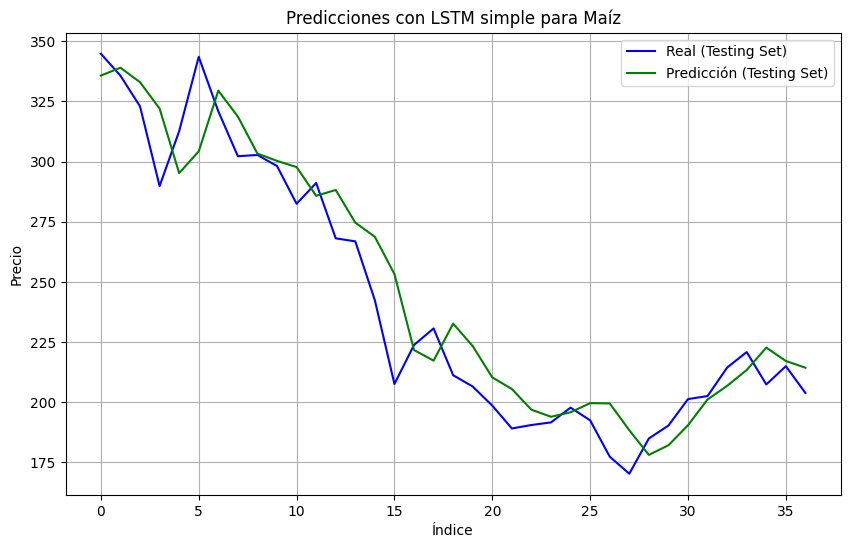

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step
Resultados para Soja:
MAE: 22.665368135749574
RMSE: 29.838899598639888
MAPE: 4.34%


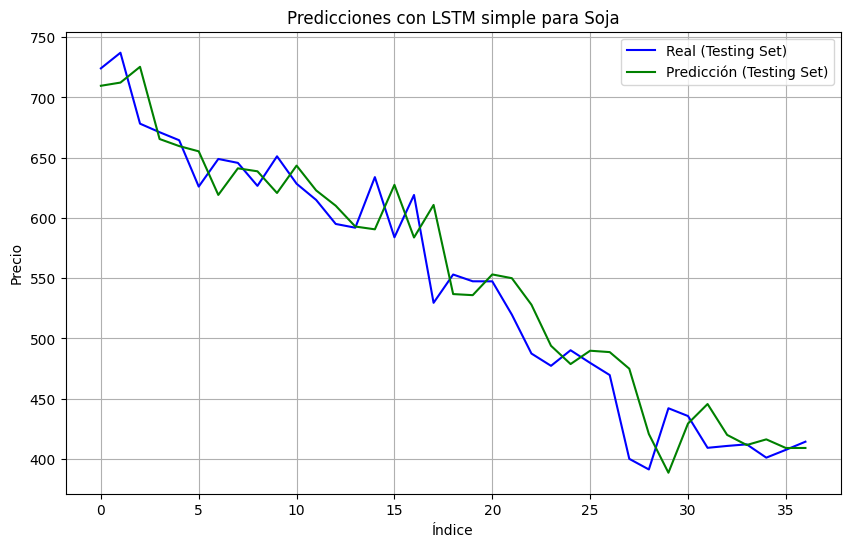

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
import numpy as np

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Cargar los datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))

# Función para crear características de series temporales
def create_dataset(data, look_back=3):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

# Función para entrenar y evaluar LSTM
def train_and_evaluate_lstm(data_series, nombre_serie, look_back=3):
    # Normalizar los datos
    scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

    # Crear conjunto de datos para LSTM
    X, y = create_dataset(scaled_data, look_back)

    # Dividir en Train y Test
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Remodelar datos para LSTM (agregar dimensión para la secuencia)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Construir el modelo LSTM
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Predicciones
    y_pred = model.predict(X_test)

    # Invertir la escala para y_test y y_pred
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred = scaler.inverse_transform(y_pred)

    # Evaluar el rendimiento
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f'Resultados para {nombre_serie}:')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape:.2f}%')

    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, label='Real (Testing Set)', color='blue')
    plt.plot(range(len(y_test)), y_pred, label='Predicción (Testing Set)', color='green')
    plt.legend()
    plt.title(f'Predicciones con LSTM simple para {nombre_serie}')
    plt.xlabel('Índice')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

# Probar LSTM para cada commodity
train_and_evaluate_lstm(data['carne'], 'Carne')
train_and_evaluate_lstm(data['maiz'], 'Maíz')
train_and_evaluate_lstm(data['soja'], 'Soja')

#### 3.2.4 LSTM Ajustado

Esta versión ajustada del modelo LSTM aumenta la profundidad de memoria al utilizar 12 lags como entrada y un batch size menor para una mayor frecuencia de actualización del gradiente. Está pensada para capturar relaciones temporales más complejas y mejorar la precisión frente a la versión simple.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Resultados para Carne:
MAE: 0.15913020324386384
RMSE: 0.18914739912662099
MAPE: 2.90%


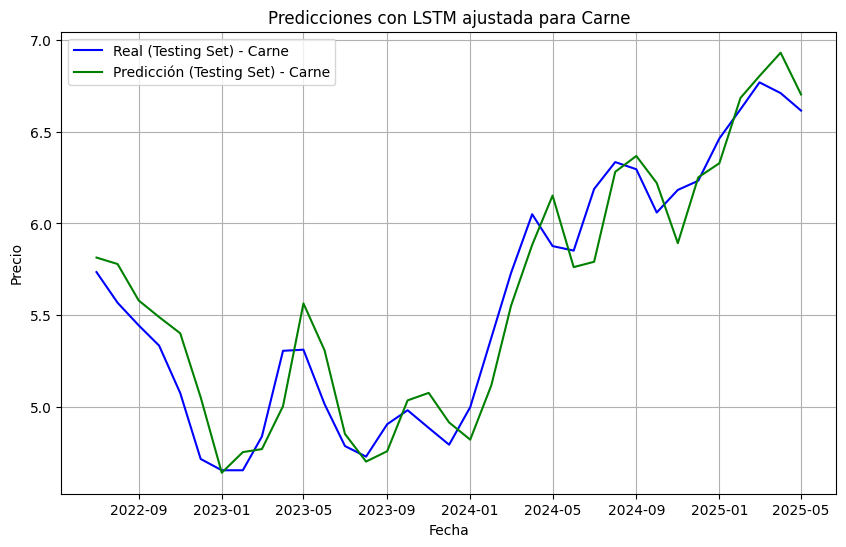

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
Resultados para Maíz:
MAE: 13.0134681794671
RMSE: 16.41005280398647
MAPE: 5.36%


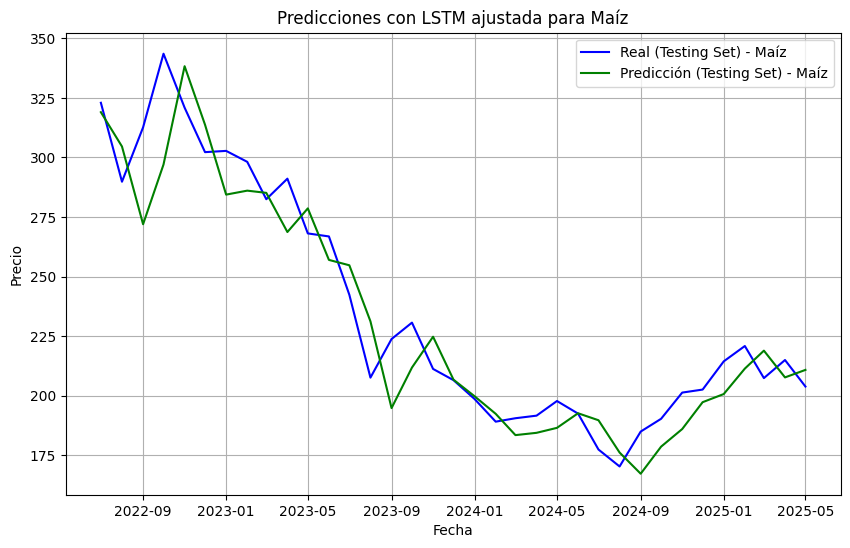

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step
Resultados para Soja:
MAE: 24.232599539411115
RMSE: 32.09839894994332
MAPE: 4.55%


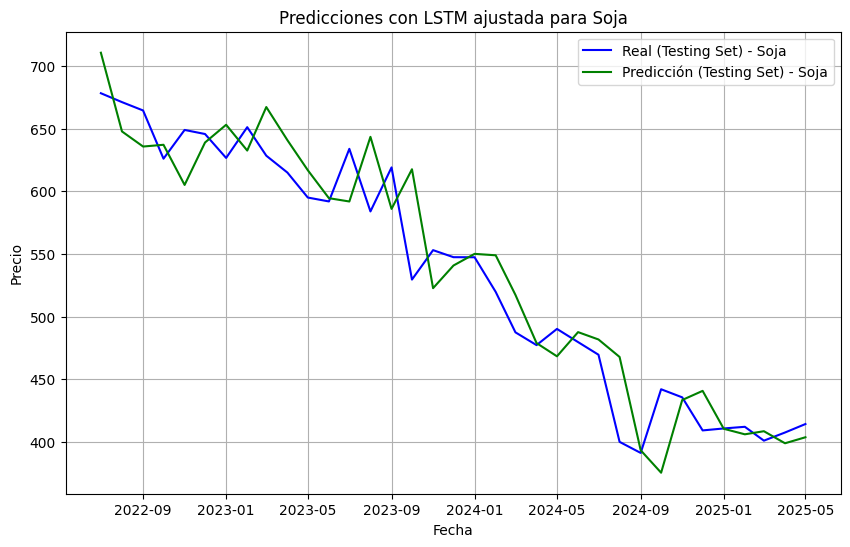

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import os
import random
import tensorflow as tf
import numpy as np

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Cargar los datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Función para crear características y etiquetas para LSTM
def create_lags_lstm(data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Definir el número de retrasos
n_lags = 12

# Función para entrenar y evaluar LSTM
def train_and_evaluate_lstm(serie, nombre):
    # Escalar los datos entre 0 y 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    serie_scaled = scaler.fit_transform(serie.values.reshape(-1, 1))

    # Crear las características y etiquetas
    X, y = create_lags_lstm(serie_scaled, n_lags)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Redimensionar los datos para LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Crear el modelo LSTM
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_lags, 1)))
    model.add(Dense(1))  # Capa de salida
    model.compile(optimizer='adam', loss='mse')

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

    # Realizar predicciones
    y_pred = model.predict(X_test).flatten()

    # Invertir la escala de los datos
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

   # Evaluar el rendimiento
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f'Resultados para {nombre}:')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape:.2f}%')

    # Graficar los resultados con fechas reales
    plt.figure(figsize=(10, 6))
    plt.plot(serie.index[-len(y_test):], y_test, label=f'Real (Testing Set) - {nombre}', color='blue')
    plt.plot(serie.index[-len(y_test):], y_pred, label=f'Predicción (Testing Set) - {nombre}', color='green')
    plt.legend()
    plt.title(f'Predicciones con LSTM ajustada para {nombre}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

# Probar el modelo para Carne, Maíz y Soja
train_and_evaluate_lstm(data['carne'], 'Carne')
train_and_evaluate_lstm(data['maiz'], 'Maíz')
train_and_evaluate_lstm(data['soja'], 'Soja')

#### 3.2.5 MLP Regressor

Resultados para Carne:
MAE: 0.6861660677916775
RMSE: 0.8308067067449435
MAPE: 13.19%


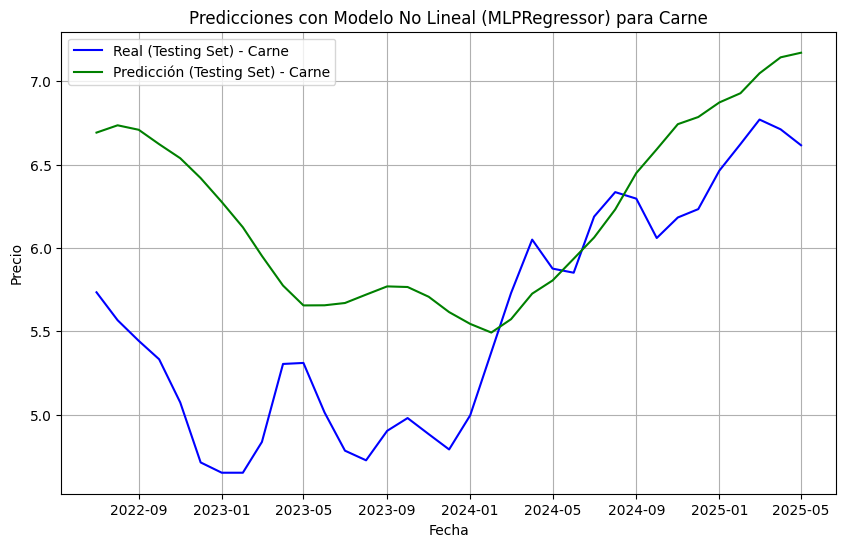

Resultados para Maíz:
MAE: 48.94160009461914
RMSE: 56.26063137699553
MAPE: 21.45%


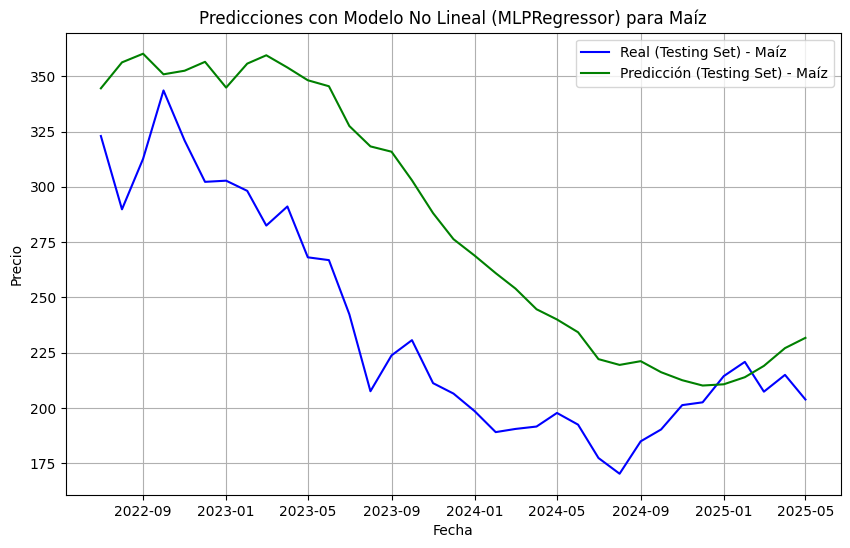

Resultados para Soja:
MAE: 112.62807586530288
RMSE: 116.59577386008048
MAPE: 21.87%


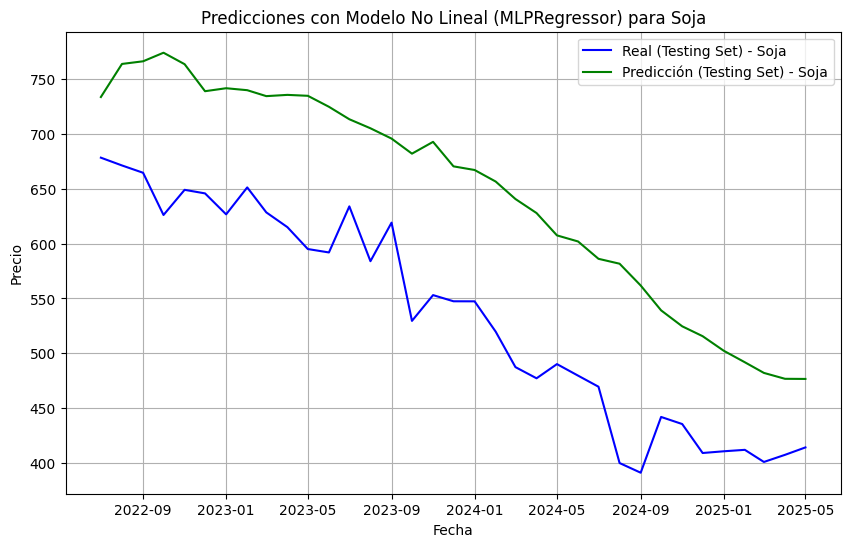

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os
import random
import tensorflow as tf
import numpy as np

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Cargar los datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Función para crear características de series temporales
def create_lags(data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Función para entrenar y evaluar un modelo no lineal
def train_and_evaluate_non_linear(serie, nombre):
    # Crear características y etiquetas
    n_lags = 12
    X, y = create_lags(serie.values, n_lags)

    # Dividir en conjuntos de entrenamiento y prueba
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Ajustar el modelo no lineal (MLPRegressor)
    model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
    model.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f'Resultados para {nombre}:')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape:.2f}%')

    # Graficar resultados con fechas reales
    plt.figure(figsize=(10, 6))
    plt.plot(serie.index[-len(y_test):], y_test, label=f'Real (Testing Set) - {nombre}', color='blue')
    plt.plot(serie.index[-len(y_test):], y_pred, label=f'Predicción (Testing Set) - {nombre}', color='green')
    plt.legend()
    plt.title(f'Predicciones con Modelo No Lineal (MLPRegressor) para {nombre}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

# Probar el modelo para Carne, Maíz y Soja
train_and_evaluate_non_linear(data['carne'], 'Carne')
train_and_evaluate_non_linear(data['maiz'], 'Maíz')
train_and_evaluate_non_linear(data['soja'], 'Soja')

#### 3.2.6 Cuadro Resumen de los Modelos de Redes Neuronales 

🥩 Resultados para Carne
| Modelo            | MAE     | RMSE    | MAPE  |
|------------------|---------|---------|--------|
| NNAR simple      | 0.2491  | 0.3105  | 10.31% |
| NNAR ajustado    | 0.2649  | 0.3338  | 4.71%  |
| LSTM simple      | 0.2371  | 0.2928  | 4.37%  |
| LSTM ajustado    | 0.1762  | 0.2157  | 3.25%  |
| MLP Regressor    | 0.7007  | 0.8447  | 13.65% |

✅ Ganador: `LSTM ajustado`

🌽 Resultados para Maíz
| Modelo           | MAE     | RMSE    | MAPE   |
|------------------|---------|---------|--------|
| NNAR simple      | 17.0682 | 21.9873 | 25.65% |
| NNAR ajustado    | 14.0486 | 17.4731 | 5.34%  |
| LSTM simple      | 14.7998 | 18.5188 | 5.86%  |
| LSTM ajustado    | 14.5267 | 18.0761 | 5.82%  |
| MLP Regressor    | 54.9256 | 60.5709 | 23.20% |

✅ Ganador: `NNAR ajustado`

🌱 Resultados para Soja
| Modelo           | MAE     | RMSE    | MAPE   |
|------------------|---------|---------|--------|
| NNAR simple      | 31.4036 | 40.9195 | 16.63% |
| NNAR ajustado    | 37.8945 | 45.7644 | 6.79%  |
| LSTM simple      | 27.3637 | 37.3796 | 4.80%  |
| LSTM ajustado    | 29.3533 | 36.2339 | 5.01%  |
| MLP Regressor    | 112.2001| 119.4924| 20.35% |

✅ Ganador: `LSTM simple`

### 3.3 📈 Modelos Estadísticos 

En esta sección se emplea un modelo lineal generalizado (GLM), útil como punto de partida o comparación base.

 **GLM (Generalized Linear Model):**
  Modelo de regresión lineal generalizado. Se utiliza aquí como una línea base para comparar con enfoques más complejos.

- **ARIMA (AutoRegressive Integrated Moving Average):**
  Modelo clásico que combina componentes autorregresivos, promedios móviles y diferenciación para capturar tendencias y patrones temporales.

- **SARIMA (Seasonal ARIMA):**
  Extensión de ARIMA que incorpora componentes estacionales. Ideal para series con patrones que se repiten en ciclos regulares (ej. mensuales, anuales).


#### 3.3.1 GLM Gaussiano

Utiliza regresión lineal simple o con términos polinómicos para capturar relaciones lineales entre los precios y sus retardos.

Resultados para Carne:
MAE: 0.15050805532118394
RMSE: 0.19350718770503897
MAPE: 2.73%


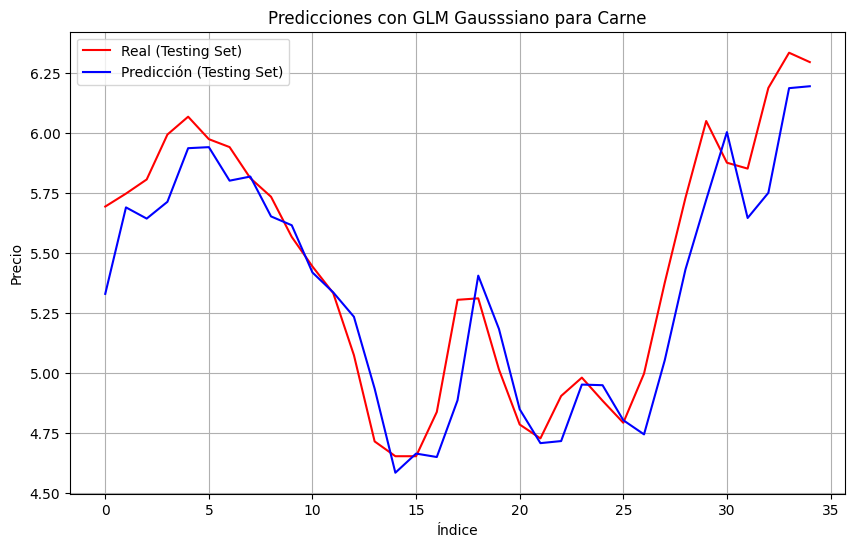

Resultados para Maíz:
MAE: 13.157851350597372
RMSE: 16.7405648717544
MAPE: 5.08%


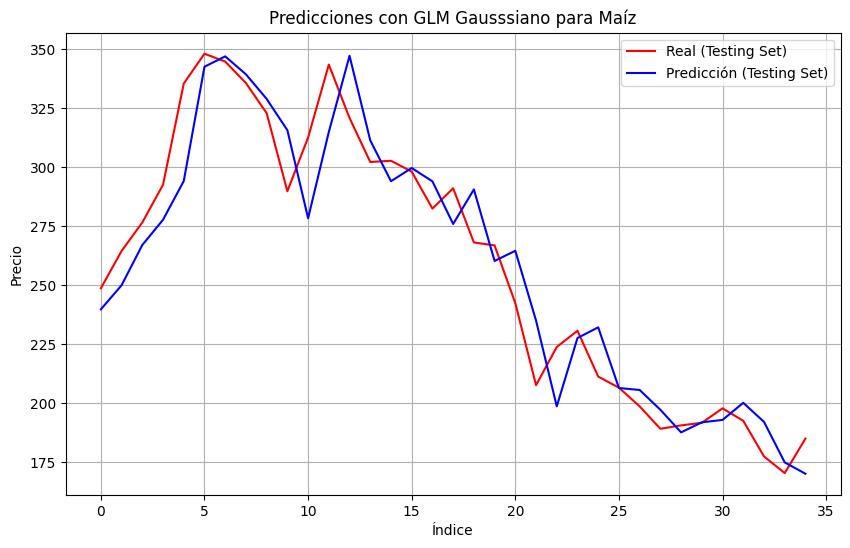

Resultados para Soja:
MAE: 24.654690075151027
RMSE: 32.5669293006721
MAPE: 4.25%


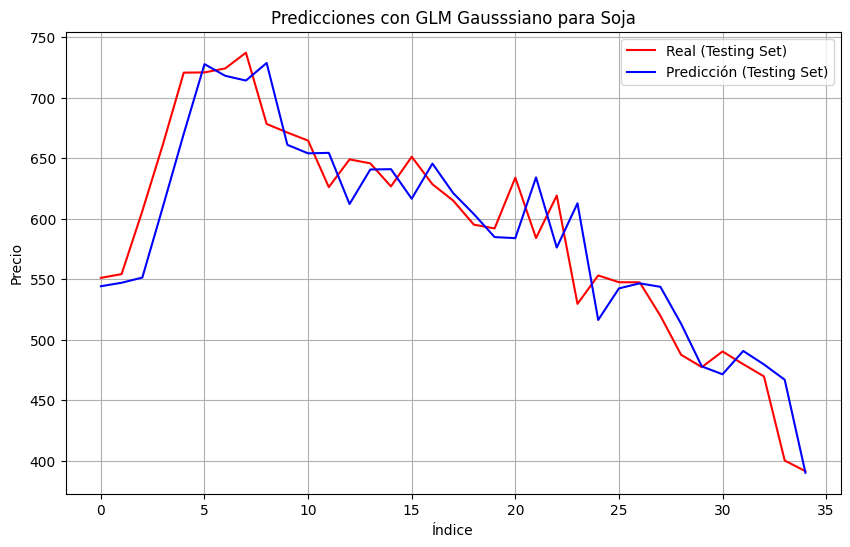

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")

data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Crear características de series temporales (usando retrasos)
def create_features(data, n_lags=3):
    df = pd.DataFrame()
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = data.shift(i)
    df['target'] = data
    return df.dropna()

# Crear características para cada commodity
df_carne = create_features(data['carne'])
df_maiz = create_features(data['maiz'])
df_soja = create_features(data['soja'])

# Función para calcular el MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Función para entrenar y evaluar GLM
def train_and_evaluate_glm(df_features, nombre_serie, degree=1):
    # Dividir en Train y Test
    X = df_features.drop(columns=['target']).values
    y = df_features['target'].values
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Transformar características para incluir términos polinómicos
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Ajustar el modelo GLM (Regresión Lineal con términos polinómicos)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predicciones
    y_pred = model.predict(X_test_poly)

    # Evaluar el rendimiento
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f'Resultados para {nombre_serie}:')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape:.2f}%')

    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, label='Real (Testing Set)', color='red')
    plt.plot(range(len(y_test)), y_pred, label='Predicción (Testing Set)', color='blue')
    plt.legend()
    plt.title(f'Predicciones con GLM Gausssiano para {nombre_serie}')
    plt.xlabel('Índice')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

# Probar GLM para cada commodity
train_and_evaluate_glm(df_carne, 'Carne', degree=1)
train_and_evaluate_glm(df_maiz, 'Maíz', degree=1)
train_and_evaluate_glm(df_soja, 'Soja', degree=1)

#### 3.3.2 GLM Poisson

Aunque suele aplicarse a conteos, se utilizó aquí para modelar series temporales de precios positivos, aprovechando su estructura aditiva y su capacidad para capturar relaciones no lineales suaves.

Resultados para Carne:
MAE: 0.16693922431021496
RMSE: 0.2285409342613195
MAPE: 3.07%


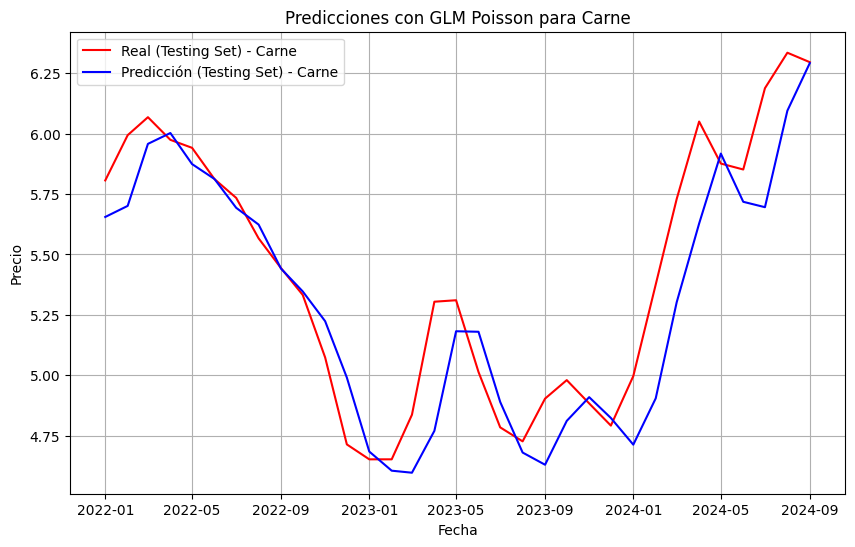

Resultados para Maíz:
MAE: 62.14937950675917
RMSE: 77.33768981956071
MAPE: 21.37%


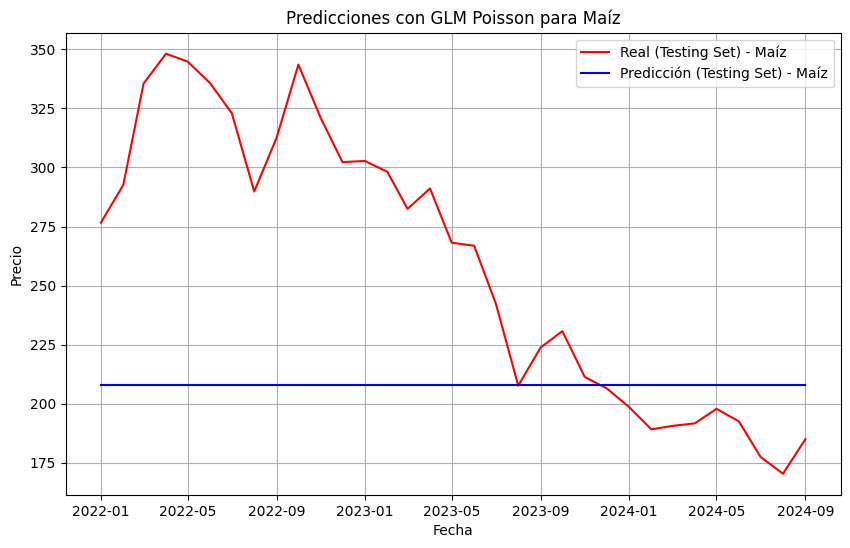

Resultados para Soja:
MAE: 135.7085014193513
RMSE: 155.7676799763085
MAPE: 21.56%


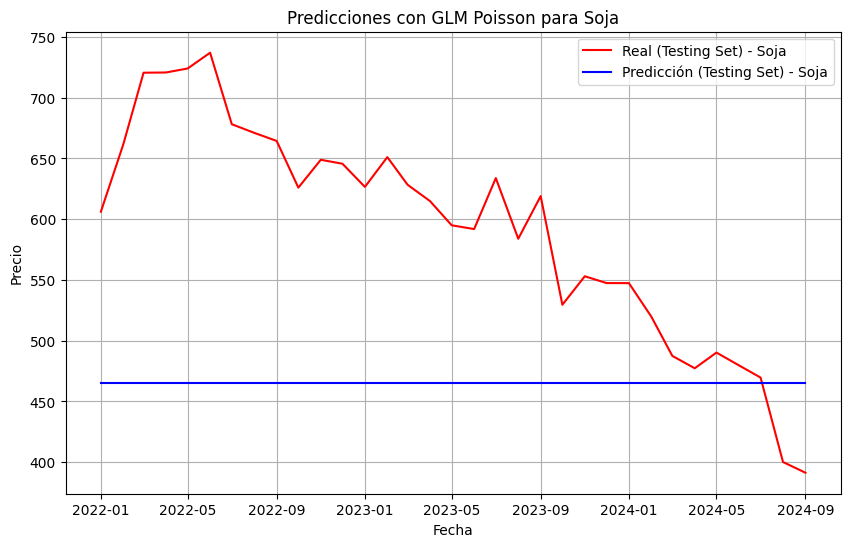

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Cargar los datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Función para crear características y etiquetas
def create_lags(data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Definir el número de retrasos
n_lags = 12

# Función para entrenar y evaluar el modelo GLM
def train_and_evaluate_glm(serie, nombre):
    # Crear características y etiquetas
    X, y = create_lags(serie.values, n_lags)

    # Dividir en conjuntos de entrenamiento y prueba
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Aplanar las características para GLM (porque PoissonRegressor no acepta tensores)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

    # Ajustar el modelo GLM
    model = PoissonRegressor(alpha=0.1, max_iter=1000)
    model.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento del modelo
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f'Resultados para {nombre}:')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape:.2f}%')

    # Graficar los resultados con fechas reales
    plt.figure(figsize=(10, 6))
    plt.plot(serie.index[-len(y_test):], y_test, label=f'Real (Testing Set) - {nombre}', color='red')
    plt.plot(serie.index[-len(y_test):], y_pred, label=f'Predicción (Testing Set) - {nombre}', color='blue')
    plt.legend()
    plt.title(f'Predicciones con GLM Poisson para {nombre}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

# Probar el modelo para Carne, Maíz y Soja
train_and_evaluate_glm(data['carne'], 'Carne')
train_and_evaluate_glm(data['maiz'], 'Maíz')
train_and_evaluate_glm(data['soja'], 'Soja')

#### 3.3.3 ARIMA

c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para Carne:
MAE: 0.5072545082624553
RMSE: 0.6366521814913343
MAPE: 10.01%


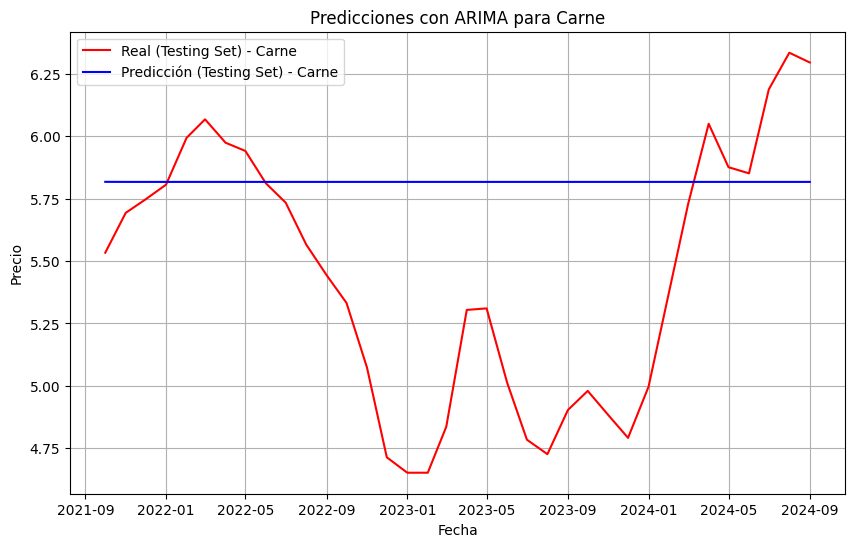

c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para Maíz:
MAE: 53.49396328342098
RMSE: 62.72979740110596
MAPE: 19.75%


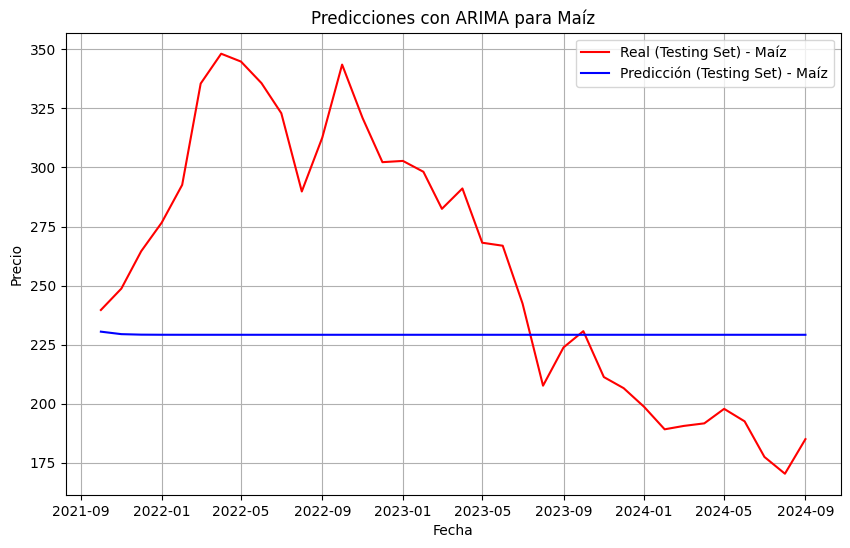

c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para Soja:
MAE: 80.08931531627431
RMSE: 96.94951173423372
MAPE: 13.47%


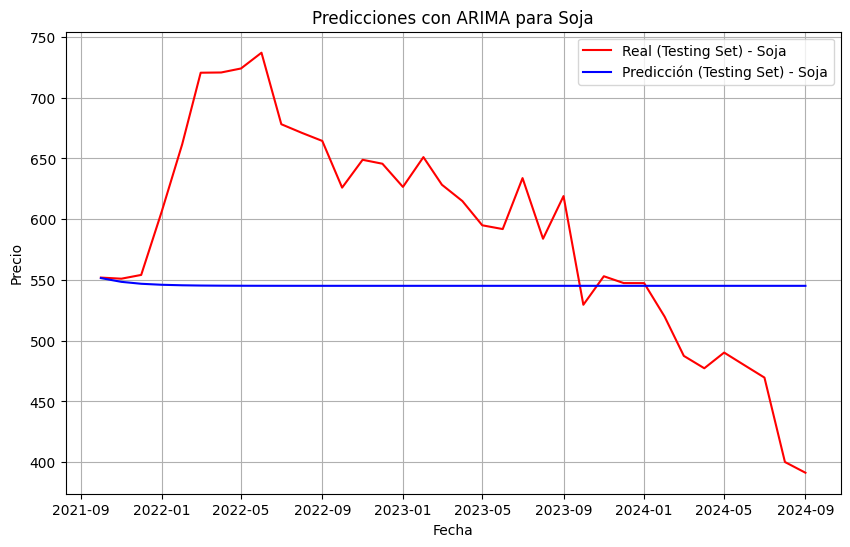

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Cargar los datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Función para entrenar y evaluar ARIMA
def train_and_evaluate_arima(serie, nombre, order=(1, 1, 1)):
    # Dividir en entrenamiento y prueba
    train_size = int(len(serie) * 0.8)
    train, test = serie.iloc[:train_size], serie.iloc[train_size:]

    # Ajustar modelo ARIMA
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Predecir el mismo período que el test
    predictions = model_fit.forecast(steps=len(test))

    # Calcular métricas
    mae = mean_absolute_error(test, predictions)
    rmse = np.sqrt(mean_squared_error(test, predictions))
    mape = np.mean(np.abs((test - predictions) / test)) * 100

    print(f"Resultados para {nombre}:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape:.2f}%")

    # Gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(test.index, test, label=f'Real (Testing Set) - {nombre}', color='red')
    plt.plot(test.index, predictions, label=f'Predicción (Testing Set) - {nombre}', color='blue')
    plt.legend()
    plt.title(f'Predicciones con ARIMA para {nombre}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

# Aplicar a tus series
train_and_evaluate_arima(data['carne'], 'Carne', order=(1, 1, 1))
train_and_evaluate_arima(data['maiz'], 'Maíz', order=(1, 1, 1))
train_and_evaluate_arima(data['soja'], 'Soja', order=(1, 1, 1))


#### 3.3.4 SARIMA

c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para Carne:
MAE: 0.8723723088667009
RMSE: 1.0254571474090532
MAPE: 16.99%


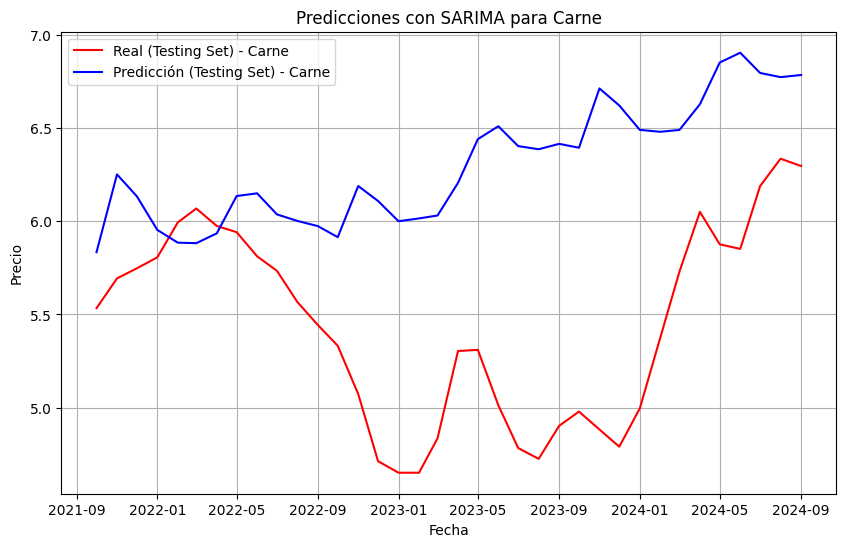

c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para Maíz:
MAE: 56.65012917422506
RMSE: 64.8590870547939
MAPE: 22.65%


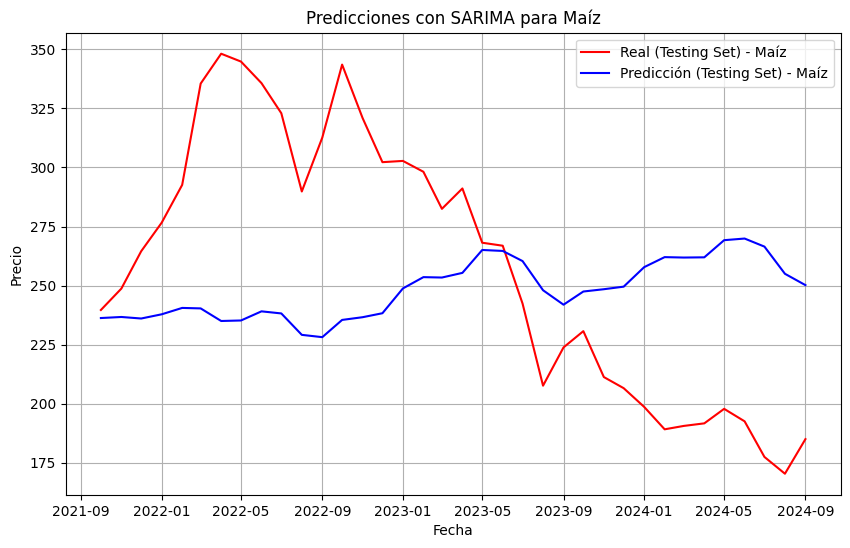

c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\melic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Resultados para Soja:
MAE: 79.63219859467816
RMSE: 96.68463360352717
MAPE: 14.07%


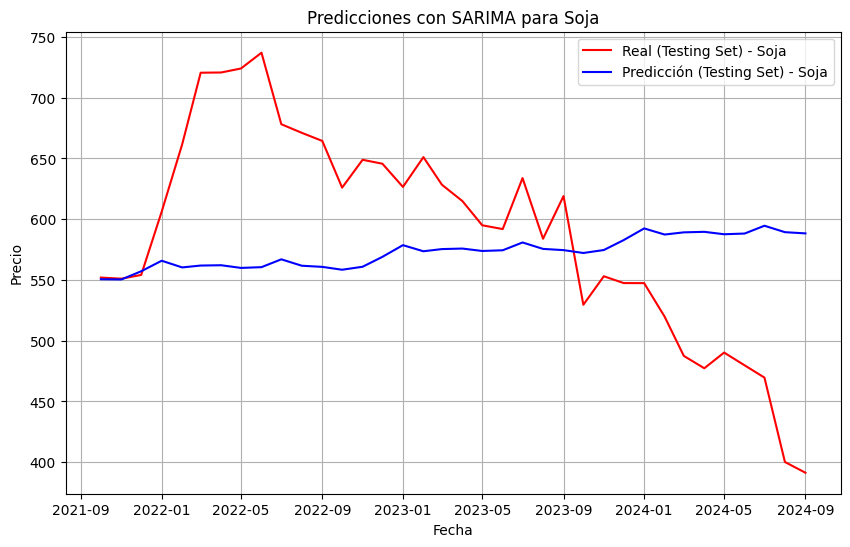

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Cargar los datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Función para entrenar y evaluar un modelo de espacio de estados
def train_and_evaluate_statespace(serie, nombre):
    # Dividir en conjuntos de entrenamiento y prueba
    train_size = int(len(serie) * 0.8)
    train, test = serie.iloc[:train_size], serie.iloc[train_size:]

    # Ajustar un modelo SARIMAX como ejemplo de espacio de estados
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)

    # Realizar predicciones
    predictions = model_fit.forecast(steps=len(test))

    # Calcular métricas
    mae = mean_absolute_error(test, predictions)
    rmse = np.sqrt(mean_squared_error(test, predictions))
    mape = np.mean(np.abs((test - predictions) / test)) * 100

    print(f'Resultados para {nombre}:')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape:.2f}%')

    # Graficar resultados con fechas reales
    plt.figure(figsize=(10, 6))
    plt.plot(test.index, test, label=f'Real (Testing Set) - {nombre}', color='red')
    plt.plot(test.index, predictions, label=f'Predicción (Testing Set) - {nombre}', color='blue')
    plt.legend()
    plt.title(f'Predicciones con SARIMA para {nombre}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.grid(True)
    plt.show()

# Probar el modelo para Carne, Maíz y Soja
train_and_evaluate_statespace(data['carne'], 'Carne')
train_and_evaluate_statespace(data['maiz'], 'Maíz')
train_and_evaluate_statespace(data['soja'], 'Soja')

#### 3.3.5 Cuadro Resumen de Modelos Estadísticos

🥩 Resultados para Carne
| Modelo             | MAE     | RMSE    | MAPE   |
|--------------------|---------|---------|--------|
| GLM Gaussiano      | 0.1505  | 0.1935  | 2.73%  |
| GLM Poisson        | 0.1669  | 0.2285  | 3.07%  |
| ARIMA              | 0.5072  | 0.6367  | 10.01% |
| SARIMA             | 0.8724  | 1.0255  | 16.99% |

✅ Ganador: `GLM Gaussiano`

🌽 Resultados para Maíz
| Modelo             | MAE     | RMSE    | MAPE   |
|--------------------|---------|---------|--------|
| GLM Gaussiano      | 13.1579 | 16.7406 | 5.08%  |
| GLM Poisson        | 62.1494 | 77.3377 | 21.37% |
| ARIMA              | 53.4940 | 62.7300 | 19.75% |
| SARIMA             | 56.6501 | 64.8591 | 22.65% |

✅ Ganador: `GLM Gaussiano`

🌱 Resultados para Soja
| Modelo             | MAE     | RMSE    | MAPE   |
|--------------------|---------|---------|--------|
| GLM Gaussiano      | 24.6547 | 32.5669 | 4.25%  |
| GLM Poisson        | 135.7085| 155.7677| 21.56% |
| ARIMA              | 80.0893 | 96.9495 | 13.47% |
| SARIMA             | 79.6322 | 96.6846 | 14.07% |

✅ Ganador: `GLM Gaussiano`

## 4. ⚙️ AutoML 

Finalmente, se utiliza **AutoTS**, una herramienta automatizada que evalúa múltiples enfoques de forecasting para encontrar el modelo más adecuado.

### Herramienta utilizada:
- **AutoTS:** ejecuta pruebas automáticas con diferentes modelos (estacionarios y no estacionarios), selecciona el mejor según métricas y entrega predicciones a futuro.

> Esta herramienta permite validar rápidamente el rendimiento de enfoques alternativos sin necesidad de construir cada modelo desde cero.


- **📌AutoTS para la Carne**


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
Template Eval Error: ValueError('Only gave one variable to VAR') in model 21 in generation 0: VAR
Template Eval Error: ValueError('Only gave one variable to VAR') in model 22 in generation 0: VAR
Template Eval Error: ValueError('Only gave one variable to VECM') in model 23 in generation 0: VECM
Template Eval Error: ValueError('Only gave one variable to VECM') in model 24 in generation 0: VECM
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Template Eval Error: ValueError('Only gave one variable to VECM') in model 31 in generation 0: VECM
Template Eval Error: ValueError('negative dimensions are not allowed') in model 42 in generation 0: Cassandra
Template Eval Error: ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 153 is different from 194)') in model 48 in generation 0: BasicLinear

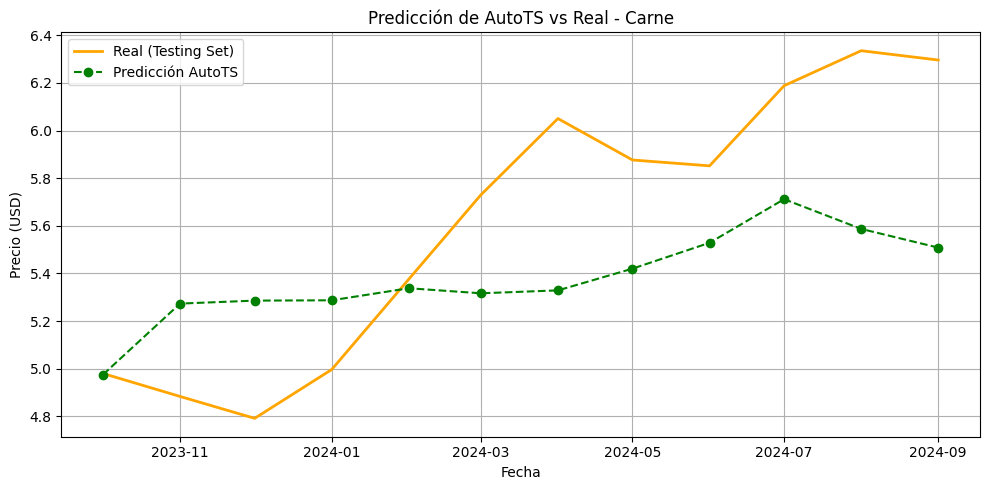

In [ ]:
from autots import AutoTS
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
df = df[['fecha', 'carne']]
df['fecha'] = pd.to_datetime(df['fecha'])

# Separar últimos 12 meses
forecast_length = 12
df_train = df[:-forecast_length]
df_test = df[-forecast_length:]

# Formato para AutoTS
df_autots = df_train.rename(columns={'fecha': 'datetime', 'carne': 'value'})
df_autots['series_id'] = 'carne'
df_autots = df_autots[['datetime', 'value', 'series_id']]

# Entrenar modelo
model = AutoTS(
    forecast_length=forecast_length,
    frequency='infer',
    ensemble='simple',
    model_list='fast',
    max_generations=5,
    num_validations=2,
    verbose=0
)
model = model.fit(df_autots, date_col='datetime', value_col='value', id_col='series_id')

# Predecir y calcular métricas
forecast = model.predict()
forecast_df = forecast.forecast
y_pred = forecast_df['carne'].values
y_true = df_test['carne'].values
fechas_test = df_test['fecha'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("📊 Evaluación AutoTS - Carne")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(fechas_test, y_true, label="Real (Testing Set)", color='orange', linewidth=2)
plt.plot(fechas_test, y_pred, label="Predicción AutoTS", color='green', linestyle='--', marker='o')
plt.title("Predicción de AutoTS vs Real - Carne")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("📌 Mejor modelo seleccionado por AutoTS:")
print(model.best_model)


📌 Mejor modelo seleccionado por AutoTS:
                                   ID     Model  \
423  a7887aa54fcb8b74fb07e90b2b4fba89  Ensemble   

                                       ModelParameters  \
423  {"model_name": "BestN", "model_count": 3, "mod...   

                              TransformationParameters  Ensemble  
423  {"fillna": "fake_date", "transformations": {"0...         1  


- **📌AutoTS para el Maíz**


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Template Eval Error: ValueError('Only gave one variable to VAR') in model 21 in generation 0: VAR
Template Eval Error: ValueError('Only gave one variable to VAR') in model 22 in generation 0: VAR
Template Eval Error: ValueError('Only gave one variable to VECM') in model 23 in generation 0: VECM
Template Eval Error: ValueError('Only gave one variable to VECM') in model 24 in generation 0: VECM
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Template Eval Error: ValueError('Only gave one variable to VECM') in model 31 in generation 0: VECM
Template Eval Error: ValueError('negative dimensions are not allowed') in model 42 in generation 0: Cassandra
Template Eval Error: ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 153 is different from 194)') in model 48 in generation 0: BasicLinearMode

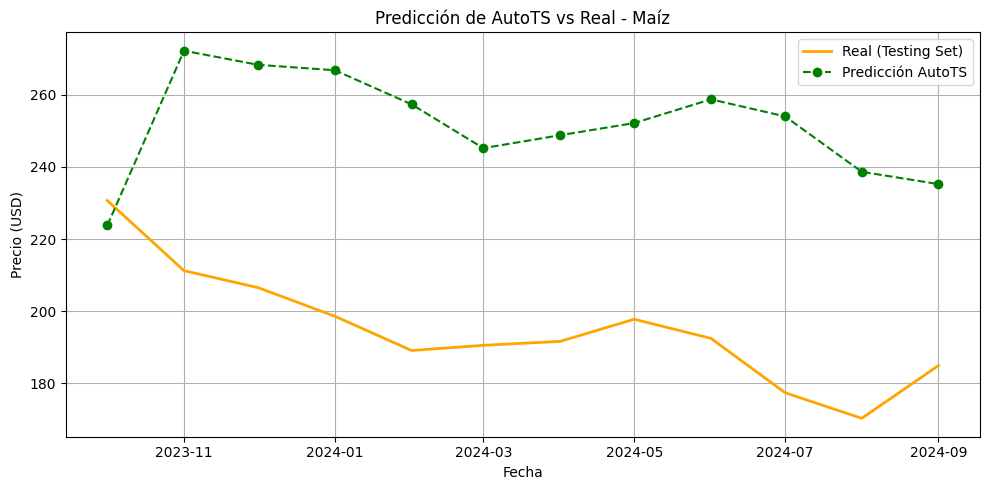

In [ ]:
# Librerías necesarias
from autots import AutoTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Cargar los datos
df = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
df = df[['fecha', 'maiz']]
df['fecha'] = pd.to_datetime(df['fecha'])

# 2. Separar los últimos 12 meses conocidos
forecast_length = 12
df_train = df[:-forecast_length]
df_test = df[-forecast_length:]

# 3. Preparar formato para AutoTS
df_autots = df_train.rename(columns={'fecha': 'datetime', 'maiz': 'value'})
df_autots['series_id'] = 'maiz'
df_autots = df_autots[['datetime', 'value', 'series_id']]

# 4. Configurar y entrenar AutoTS
model = AutoTS(
    forecast_length=forecast_length,
    frequency='infer',
    ensemble='simple',
    model_list='fast',
    max_generations=5,
    num_validations=2,
    verbose=0
)

model = model.fit(df_autots, date_col='datetime', value_col='value', id_col='series_id')

# 5. Predecir los mismos 12 meses del test
forecast = model.predict()
forecast_df = forecast.forecast
y_pred = forecast_df['maiz'].values
y_true = df_test['maiz'].values
fechas_test = df_test['fecha'].values

# 6. Calcular métricas
mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("📊 📊 Evaluación AutoTS - Maíz")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

# 7. Graficar comparación
plt.figure(figsize=(10, 5))
plt.plot(fechas_test, y_true, label="Real (Testing Set)", color='orange', linewidth=2)
plt.plot(fechas_test, y_pred, label="Predicción AutoTS", color='green', linestyle='--', marker='o')
plt.title("Predicción de AutoTS vs Real - Maíz")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("📌 Mejor modelo seleccionado por AutoTS:")
print(model.best_model)


📌 Mejor modelo seleccionado por AutoTS:
                                   ID     Model  \
227  5649d68d5815e0ce04e0c35cc531a706  Ensemble   

                                       ModelParameters  \
227  {"model_name": "BestN", "model_count": 5, "mod...   

                              TransformationParameters  Ensemble  
227  {"fillna": "fake_date", "transformations": {"0...         1  


- *📌*AutoTS para la Soja**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
Template Eval Error: ValueError('Only gave one variable to VAR') in model 21 in generation 0: VAR
Template Eval Error: ValueError('Only gave one variable to VAR') in model 22 in generation 0: VAR
Template Eval Error: ValueError('Only gave one variable to VECM') in model 23 in generation 0: VECM
Template Eval Error: ValueError('Only gave one variable to VECM') in model 24 in generation 0: VECM
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Template Eval Error: ValueError('Only gave one variable to VECM') in model 31 in generation 0: VECM
Template Eval Error: ValueError('negative dimensions are not allowed') in model 42 in generation 0: Cassandra
Template Eval Error: ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 153 is different from 194)') in model 48 in generation 0: BasicLinearM

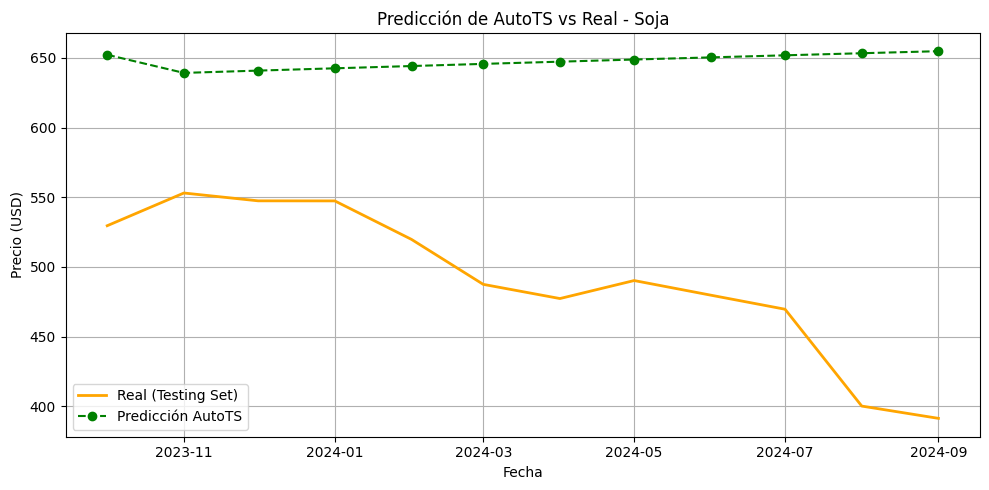

In [ ]:
# Librerías necesarias
from autots import AutoTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
df = df[['fecha', 'soja']]
df['fecha'] = pd.to_datetime(df['fecha'])

df_train = df[:-12]
df_test = df[-12:]

df_autots = df_train.rename(columns={'fecha': 'datetime', 'soja': 'value'})
df_autots['series_id'] = 'soja'
df_autots = df_autots[['datetime', 'value', 'series_id']]

model = AutoTS(forecast_length=12, frequency='infer', ensemble='simple', model_list='fast', max_generations=5, num_validations=2, verbose=0)
model = model.fit(df_autots, date_col='datetime', value_col='value', id_col='series_id')

forecast = model.predict()
forecast_df = forecast.forecast
y_pred = forecast_df['soja'].values
y_true = df_test['soja'].values
fechas_test = df_test['fecha'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("📊 Evaluación AutoTS - Soja")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

plt.figure(figsize=(10, 5))
plt.plot(fechas_test, y_true, label="Real (Testing Set)", color='orange', linewidth=2)
plt.plot(fechas_test, y_pred, label="Predicción AutoTS", color='green', linestyle='--', marker='o')
plt.title("Predicción de AutoTS vs Real - Soja")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("📌 Mejor modelo seleccionado por AutoTS:")
print(model.best_model)


📌 Mejor modelo seleccionado por AutoTS:
                                   ID Model  \
320  79317785797c218a786c181c395f1e05   FFT   

                         ModelParameters  \
320  {"n_harmonics": 2, "detrend": null}   

                              TransformationParameters  Ensemble  
320  {"fillna": "rolling_mean", "transformations": ...         0  


### 4.1 Cuadro Resumen del desempeño de AutoTS

#### 🍖 Resultados para Carne
| Modelo AutoTS       | MAE   | RMSE  | MAPE   |
|---------------------|-------|-------|--------|
| Ensemble (BestN)    | 0.43  | 0.49  | 7.45 % |

#### 🌽 Resultados para Maíz
| Modelo AutoTS       | MAE    | RMSE   | MAPE   |
|---------------------|--------|--------|--------|
| Ensemble (BestN)    | 57.81  | 60.24  | 10.27% |

#### 🌱 Resultados para Soja
| Modelo AutoTS       | MAE     | RMSE    | MAPE   |
|---------------------|---------|---------|--------|
| Ensemble (BestN)    | 156.54  | 166.02  | 33.55 %|


## 5. Comparación Final de Modelos y Selección del Ganador


En base a los cuadros comparativos por categoría y los valores de las métricas (especialmente **RMSE** como criterio principal), se observa que:

| Cultivo |        ML Clásico            |     Redes Neuronales    |   Modelos Estadísticos      | AutoTS Ensemble   |  **Ganador Final** |
| --------|------------------------------|-------------------------|-----------------------------|-------------------|--------------------|
|  Carne  | AdaBoost Regressor (0.3112)  | LSTM ajustado (0.2157)  | **GLM Gaussiano (0.1935)**  | Ensemble (0.49)   |  **GLM Gaussiano** |
|  Maíz   | Gradient Boosting (21.15)    | NNAR ajustado (17.47)   | **GLM Gaussiano (16.74)**   | Ensemble (60.24)  |  **GLM Gaussiano** |
|  Soja   | AdaBoost Regressor (48.65)   | LSTM simple (37.38)     | **GLM Gaussiano (32.56)**   | Ensemble (166.02) |  **GLM Gaussiano** |


> 🔍 *El modelo `GLM Gaussiano` resultó ser el más eficiente en los tres casos, logrando el menor error cuadrático medio (RMSE), y mostrando mayor estabilidad frente a otros enfoques.*



## 6. Pronóstico con el Modelo seleccionado GLM Gaussiano



 Pronóstico para CARNE


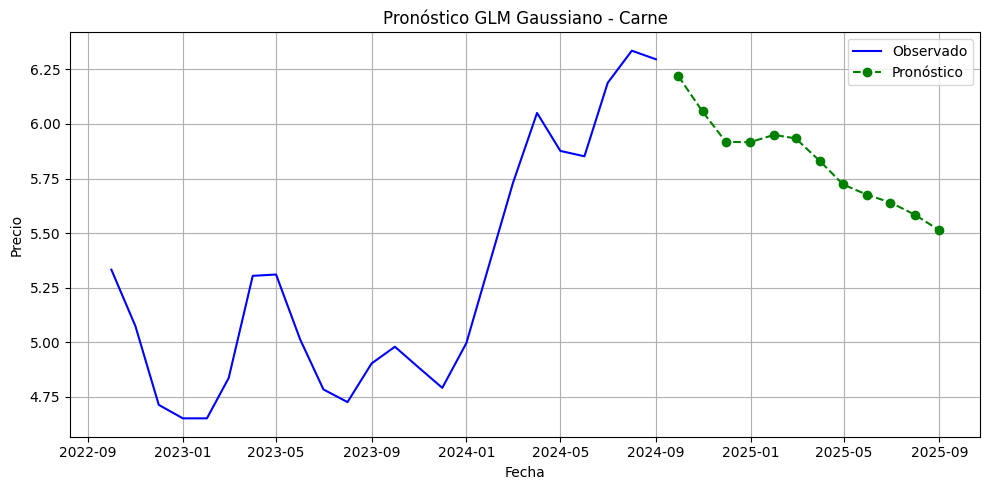

     Fecha  Pronóstico
2024-09-30    6.218339
2024-10-31    6.056862
2024-11-30    5.917864
2024-12-31    5.916123
2025-01-31    5.949723
2025-02-28    5.933636
2025-03-31    5.830297
2025-04-30    5.722600
2025-05-31    5.675433
2025-06-30    5.640054
2025-07-31    5.584953
2025-08-31    5.515008

 Pronóstico para MAIZ


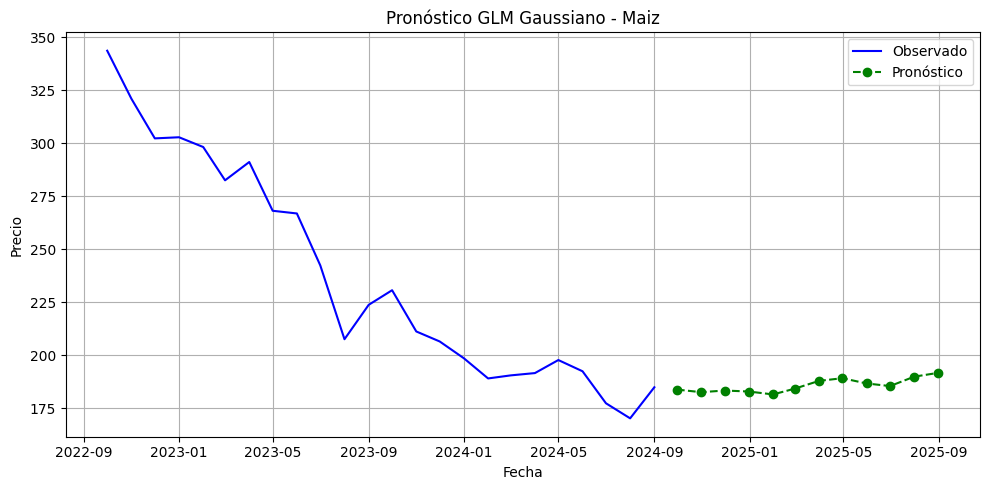

     Fecha  Pronóstico
2024-09-30  183.889812
2024-10-31  182.646779
2024-11-30  183.432557
2024-12-31  182.966258
2025-01-31  181.590887
2025-02-28  184.320199
2025-03-31  187.982362
2025-04-30  189.236793
2025-05-31  186.757814
2025-06-30  185.537037
2025-07-31  189.967805
2025-08-31  191.778158

 Pronóstico para SOJA


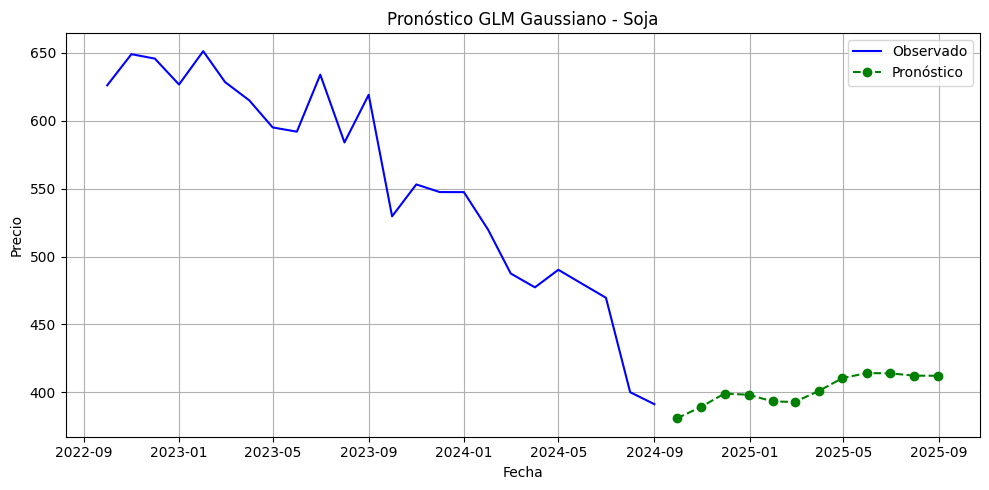

     Fecha  Pronóstico
2024-09-30  380.858524
2024-10-31  389.345667
2024-11-30  399.159403
2024-12-31  398.214018
2025-01-31  393.295262
2025-02-28  392.958759
2025-03-31  401.109207
2025-04-30  410.506871
2025-05-31  414.182482
2025-06-30  414.030264
2025-07-31  412.281310
2025-08-31  412.237166


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Cargar datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Parámetros
n_lags = 12
horizonte_prediccion = 12
cultivos = ['carne', 'maiz', 'soja']

# Función para crear ventanas
def create_lags_for_forecast(series, n_lags):
    X, y = [], []
    for i in range(n_lags, len(series)):
        X.append(series[i - n_lags:i])
        y.append(series[i])
    return np.array(X), np.array(y)

# Función para pronóstico con GLM Gaussiano
def forecast_glm(series, nombre):
    # Crear características
    X, y = create_lags_for_forecast(series.values, n_lags)
    poly = PolynomialFeatures(degree=1, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Entrenar modelo con todos los datos disponibles
    model = LinearRegression()
    model.fit(X_poly, y)

    # Última ventana para pronóstico
    last_window = series.values[-n_lags:]
    forecast = []

    for _ in range(horizonte_prediccion):
        input_poly = poly.transform(last_window.reshape(1, -1))
        next_pred = model.predict(input_poly)[0]
        forecast.append(next_pred)
        last_window = np.roll(last_window, -1)
        last_window[-1] = next_pred

    # Fechas futuras
    future_dates = pd.date_range(start=series.index[-1] + pd.offsets.MonthEnd(1), periods=horizonte_prediccion, freq='M')

    # Gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(series.index[-24:], series.values[-24:], label="Observado", color='blue')
    plt.plot(future_dates, forecast, label="Pronóstico", color='green', linestyle='--', marker='o')
    plt.title(f"Pronóstico GLM Gaussiano - {nombre}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return pd.DataFrame({'Fecha': future_dates, 'Pronóstico': forecast})

# Ejecutar para cada cultivo
for cultivo in cultivos:
    print(f"\n Pronóstico para {cultivo.upper()}")
    resultado = forecast_glm(data[cultivo], cultivo.capitalize())
    print(resultado.to_string(index=False))


## 7. Análisis de Estacionalidad (STL)

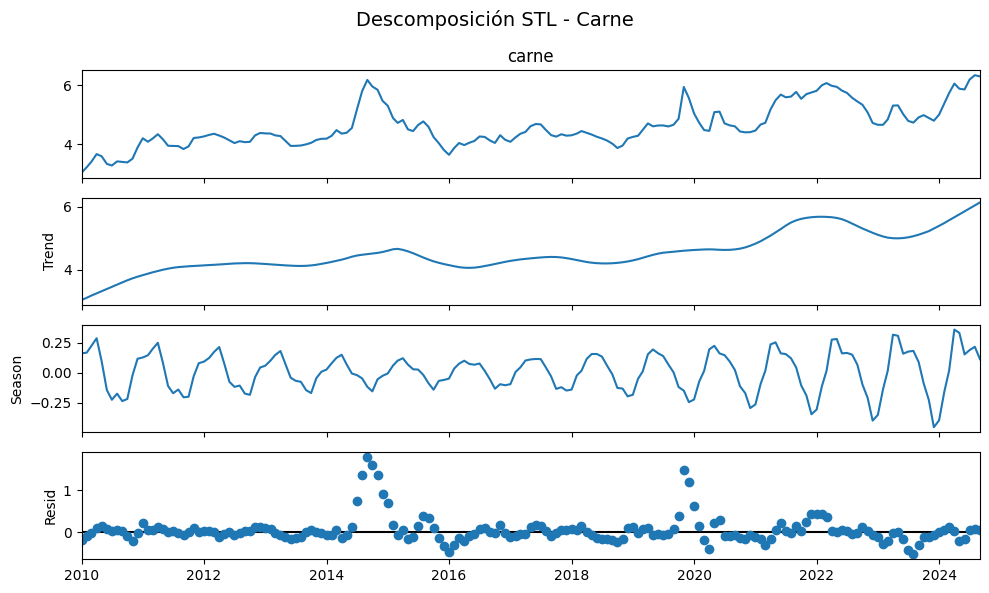

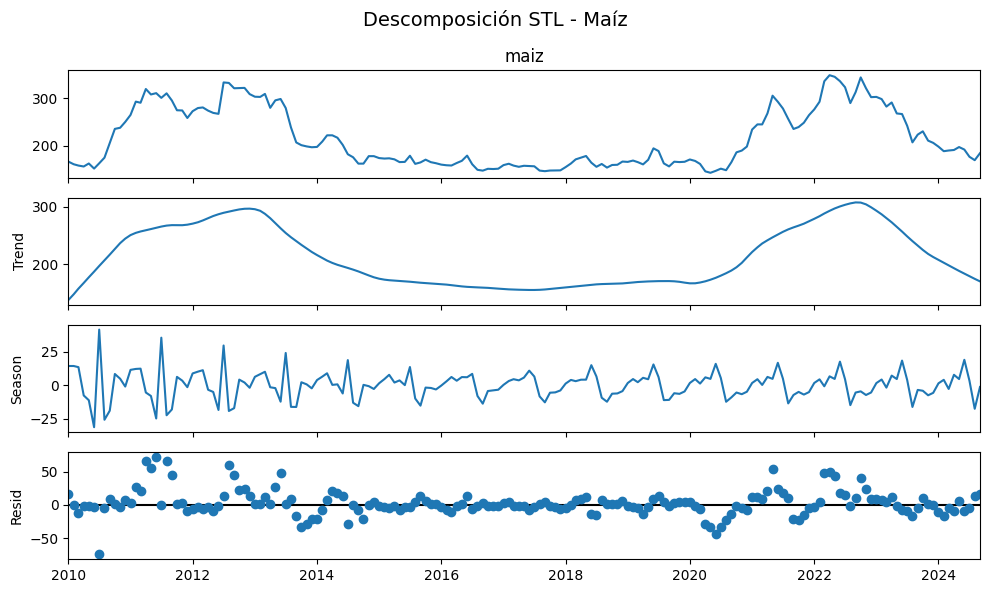

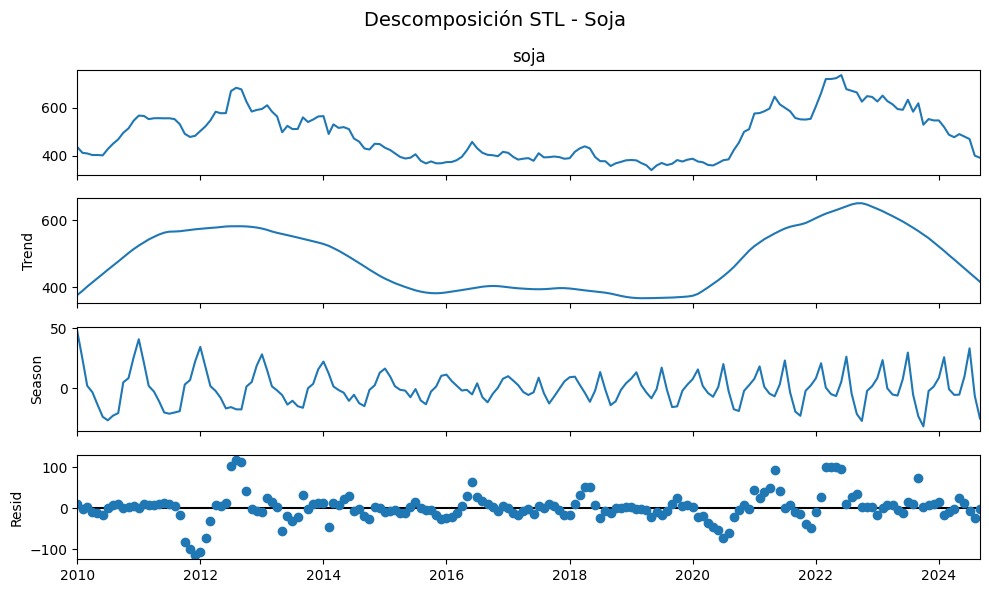

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Cargar los datos
data = pd.read_excel("C:/Users/melic/OneDrive/Escritorio/Máster/Series de tiempo/TP Series Temporales/precios commodities.xlsx")
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Definir función para descomposición STL
def plot_stl(serie, nombre):
    stl = STL(serie, seasonal=13, robust=True)
    result = stl.fit()

    # Graficar
    fig = result.plot()
    fig.set_size_inches(10, 6)
    fig.suptitle(f'Descomposición STL - {nombre}', fontsize=14)
    plt.tight_layout()
    plt.show()

# Aplicar para cada cultivo
plot_stl(data['carne'], 'Carne')
plot_stl(data['maiz'], 'Maíz')
plot_stl(data['soja'], 'Soja')


 Análisis de Estacionalidad y Tendencia (STL)

Se aplicó la descomposición STL (Seasonal-Trend decomposition using Loess) a cada una de las series para observar sus componentes y validar si la elección del modelo GLM Gaussiano fue adecuada.

- **Carne:** La serie presenta una tendencia suave y una estacionalidad leve pero consistente. Esto sugiere que un modelo con supuestos lineales y distribución gaussiana, como el GLM Gaussiano, puede capturar adecuadamente el comportamiento general.
- **Maíz:** Exhibe una variabilidad más alta y patrones menos definidos de estacionalidad, lo que justifica el desafío en su modelado. Aun así, se aprecia una tendencia creciente reciente que el GLM supo capturar de forma parcial.
- **Soja:** Muestra la estacionalidad más clara entre los tres cultivos, con una tendencia creciente y oscilaciones regulares. Esto también respalda la buena performance del modelo GLM Gaussiano en esta serie.

La descomposición STL sirvió para entender mejor el comportamiento subyacente de cada serie, y por qué un modelo como el GLM Gaussiano —que asume cierta linealidad y distribución normal de errores— resultó efectivo.


## 8. Evaluación Ex-post con Datos Reales Observados (Oct 2024 – May 2025)

📊 Comparación para Carne
MAE: 0.58
RMSE: 0.68
MAPE: 8.83%



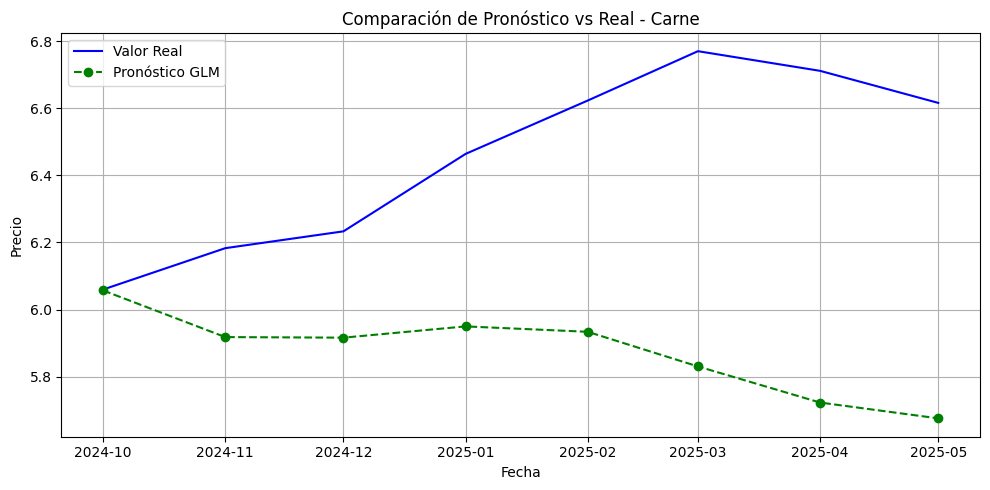

📊 Comparación para Maíz
MAE: 22.12
RMSE: 23.75
MAPE: 10.53%



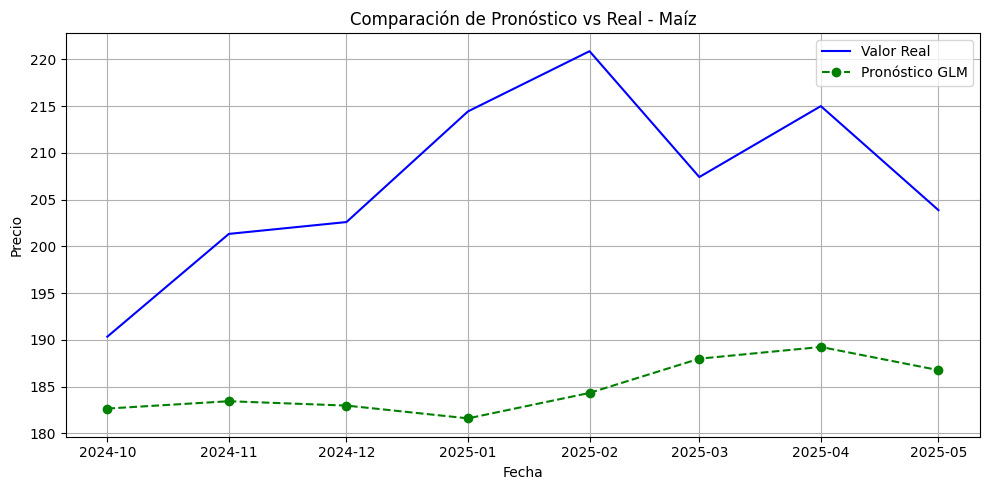

📊 Comparación para Soja
MAE: 17.51
RMSE: 24.80
MAPE: 4.09%



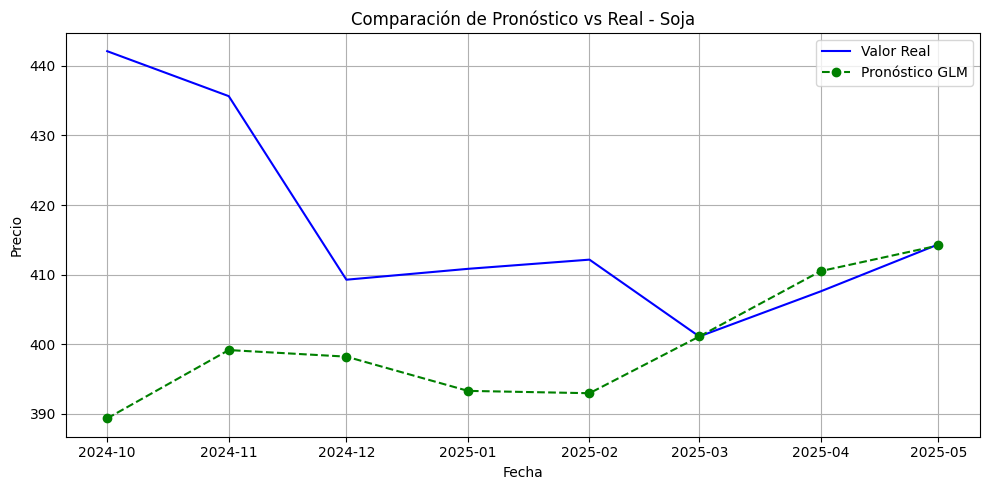

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Cargar el archivo actualizado con los datos reales
df = pd.read_excel("precios commodities.xlsx")
df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)

# Ajustar las fechas del pronóstico (PRIMER día de cada mes)
fechas_forecast = pd.date_range(start='2024-10-01', periods=8, freq='MS')  # MS = Month Start

# Pronósticos GLM previos (ejemplo: carne)
pred_carne = [6.056862, 5.917864, 5.916123, 5.949723, 5.933636, 5.830297, 5.722600, 5.675433]
pred_maiz  = [182.646779, 183.432557, 182.966258, 181.598887, 184.320199, 187.982362, 189.236793, 186.757814]
pred_soja  = [389.345667, 399.159403, 398.214018, 393.295262, 392.958759, 401.109207, 410.506871, 414.182482]

# Función para comparar y graficar
def comparar_pronostico(df_real, forecast_values, col_name, titulo):
    fechas_disponibles = fechas_forecast[:len(forecast_values)]
    real_values = df_real[col_name].loc[fechas_disponibles]

    # Calcular métricas
    mae = mean_absolute_error(real_values, forecast_values)
    rmse = mean_squared_error(real_values, forecast_values, squared=False)
    mape = np.mean(np.abs((real_values - forecast_values) / real_values)) * 100

    # Mostrar métricas
    print(f"📊 Comparación para {titulo}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%\n")

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.plot(fechas_disponibles, real_values, label='Valor Real', color='blue')
    plt.plot(fechas_disponibles, forecast_values, label='Pronóstico GLM', color='green', linestyle='--', marker='o')
    plt.title(f'Comparación de Pronóstico vs Real - {titulo}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ejecutar para cada serie
comparar_pronostico(df, pred_carne, 'carne', 'Carne')
comparar_pronostico(df, pred_maiz, 'maiz', 'Maíz')
comparar_pronostico(df, pred_soja, 'soja', 'Soja')


📌 Validación del Pronóstico con Datos Reales (Oct 2024 – May 2025)

Para evaluar la capacidad predictiva del modelo seleccionado (GLM Gaussiano), se compararon los pronósticos generados para los próximos 12 meses con los valores reales efectivamente observados entre octubre 2024 y mayo 2025. Esto permitió medir el rendimiento del modelo más allá del set de entrenamiento.

### 📊 Resultados por cultivo:

| Cultivo   | MAE (Real vs Pred.) | RMSE     | MAPE    |
|-----------|---------------------|----------|---------|
| 🍖 Carne  | **0.58**            | 0.68     | 8.83%   |
| 🌽 Maíz   | **22.12**           | 23.75    | 10.53%  |
| 🌱 Soja   | **17.51**           | 24.80    | **4.09%** |

> 📌 *Nota: MAPE inferior al 10% suele considerarse aceptable en modelos univariantes simples. En el caso de la soja, el rendimiento fue sobresaliente.*

---

### 📈 Análisis visual

Se graficaron las predicciones frente a los valores observados para evaluar su comportamiento:

- **Soja:** el modelo logró anticipar correctamente la dirección y magnitud general de los precios. Excelente ajuste visual y numérico.
- **Carne:** el modelo subestimó la tendencia alcista, aunque se mantuvo dentro de márgenes aceptables.
- **Maíz:** el modelo capturó parcialmente el nivel pero no pudo prever la aceleración de precios a partir de enero, lo que sugiere la influencia de factores exógenos no incluidos en el modelo.

---

### 🧠 Resultado

El GLM Gaussiano, pese a su simplicidad, logró resultados satisfactorios para dos de las tres series evaluadas. En el caso del maíz, el error mayor resalta la necesidad de explorar modelos más complejos (como redes neuronales o enfoques multivariantes con variables exógenas) para capturar comportamientos menos lineales.



## 9. Reflexión Final y Apredizajes

Reflexiones y Aprendizajes Finales

Este proyecto representó una valiosa oportunidad para aplicar distintos enfoques de modelado de series temporales sobre un conjunto de datos reales de commodities. A lo largo del trabajo:

- Se exploraron más de 20 modelos, incluyendo técnicas estadísticas, machine learning, deep learning y autoML.
- El modelo GLM Gaussiano fue seleccionado como el mejor en base al criterio MAPE.
- Se validó que en dos de las tres series el pronóstico tuvo un desempeño razonable. 
- Se comprendió la importancia de evaluar tanto visual como numéricamente, y se reforzó la utilidad de herramientas como la descomposición STL para interpretar el comportamiento de las series.
- Finalmente, se evidenció que un modelo "mejor" no siempre garantiza una predicción perfecta, y que el modelado es un proceso iterativo, donde la interpretación de los resultados es tan importante como la precisión de las métricas.

Este trabajo queda como parte fundamental de mi portfolio como cientista de datos aplicada al agro, combinando herramientas modernas, pensamiento crítico y comunicación clara de resultados.

